## Analysis ACF - PCF Time series 

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
#!pip install pmdarima --quiet
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [19]:
ari = pd.read_csv("data_ari.csv",sep=",",dtype={'location':str,'year_week':str,
                                                'value':np.float32,'relative_humidity_2m':np.float64,
                                                'temperature_2m_max':np.float64,'temperature_2m_min':np.float64},
                                                parse_dates=['truth_date'])
ari = ari.drop(columns=['Unnamed: 0']).reset_index(drop=True)
ari.tail()

location truth_date year_week        value  relative_humidity_2m  \
5261       RO 2024-10-13  2024-W41   917.299988              69.57961   
5262       DE 2024-10-13  2024-W41  1913.000000              80.27663   
5263       HU 2024-10-13  2024-W41  2191.800049              79.25637   
5264       SI 2024-10-13  2024-W41  1748.699951              83.50453   
5265       BE 2024-10-13  2024-W41  1384.099976              82.94098   

      temperature_2m_max  temperature_2m_min  covid  
5261           22.888000           11.746333      0  
5262           16.115000            8.390000      0  
5263           19.500666           10.467334      0  
5264           18.756998           11.148666      0  
5265           14.331166            9.156167      0

In [20]:
ili = pd.read_csv("data_ili.csv",sep=",",dtype={'location':str,'year_week':str,
                                                'value':np.float32,'relative_humidity_2m':np.float64,
                                                'temperature_2m_max':np.float64,'temperature_2m_min':np.float64},
                                                parse_dates=['truth_date'])
ili = ili.drop(columns=['Unnamed: 0']).reset_index(drop=True)
ili.tail()

location truth_date year_week        value  relative_humidity_2m  \
8341       BE 2024-10-13  2024-W41   240.500000             82.940980   
8342       NO 2024-10-13  2024-W41    20.600000             92.238790   
8343       DK 2024-10-13  2024-W41   154.100006             81.480760   
8344       MT 2024-10-13  2024-W41  4600.000000             66.957344   
8345       AT 2024-10-13  2024-W41  3214.199951             82.496320   

      temperature_2m_max  temperature_2m_min  covid  
8341           14.331166            9.156167      0  
8342           10.406834            4.981833      0  
8343           13.292500            9.684167      0  
8344           27.473833           21.515501      0  
8345           13.673167            4.914833      0

In [44]:
ili.groupby('location').count()

truth_date  year_week  value  relative_humidity_2m  \
location                                                       
AT               262        262    262                   262   
BE               524        524    524                   524   
CZ               523        523    523                   523   
DK               406        406    406                   406   
EE               514        514    514                   514   
FR               349        349    349                   349   
GR               514        514    514                   514   
HR               326        326    326                   326   
HU               324        324    324                   324   
IE               523        523    523                   523   
LT               510        510    510                   510   
LU               406        406    406                   406   
LV               335        335    335                   335   
MT               364        364    364                   364   
NL               524        524    524                   524   
NO               385        385    385                   385   
PL               520        520    520                   520   
RO               513        513    513                   513   
SI               524        524    524                   524   

          temperature_2m_max  temperature_2m_min  covid  
location                                                 
AT                       262                 262    262  
BE                       524                 524    524  
CZ                       523                 523    523  
DK                       406                 406    406  
EE                       514                 514    514  
FR                       349                 349    349  
GR                       514                 514    514  
HR                       326                 326    326  
HU                       324                 324    324  
IE                       523                 523    523  
LT                       510                 510    510  
LU                       406                 406    406  
LV                       335                 335    335  
MT                       364                 364    364  
NL                       524                 524    524  
NO                       385                 385    385  
PL                       520                 520    520  
RO                       513                 513    513  
SI                       524                 524    524

In [46]:
ari.groupby('location').count()

truth_date  year_week  value  relative_humidity_2m  \
location                                                       
BE               524        524    524                   524   
BG               514        514    514                   514   
CZ               523        523    523                   523   
DE               524        524    524                   524   
EE               506        506    506                   506   
ES               158        158    158                   158   
FR               167        167    167                   167   
HU                66         66     66                    66   
LT               508        508    508                   508   
LU               405        405    405                   405   
LV               334        334    334                   334   
RO               513        513    513                   513   
SI               524        524    524                   524   

          temperature_2m_max  temperature_2m_min  covid  
location                                                 
BE                       524                 524    524  
BG                       514                 514    514  
CZ                       523                 523    523  
DE                       524                 524    524  
EE                       506                 506    506  
ES                       158                 158    158  
FR                       167                 167    167  
HU                        66                  66     66  
LT                       508                 508    508  
LU                       405                 405    405  
LV                       334                 334    334  
RO                       513                 513    513  
SI                       524                 524    524

In [21]:
# Group the data by country
countries_ari = ['BE', 'BG', 'CZ', 'EE', 'FR', 'DE', 'HU', 'LT', 'RO',
       'SI', 'ES','LV']
countries_ari2 = ['LU']

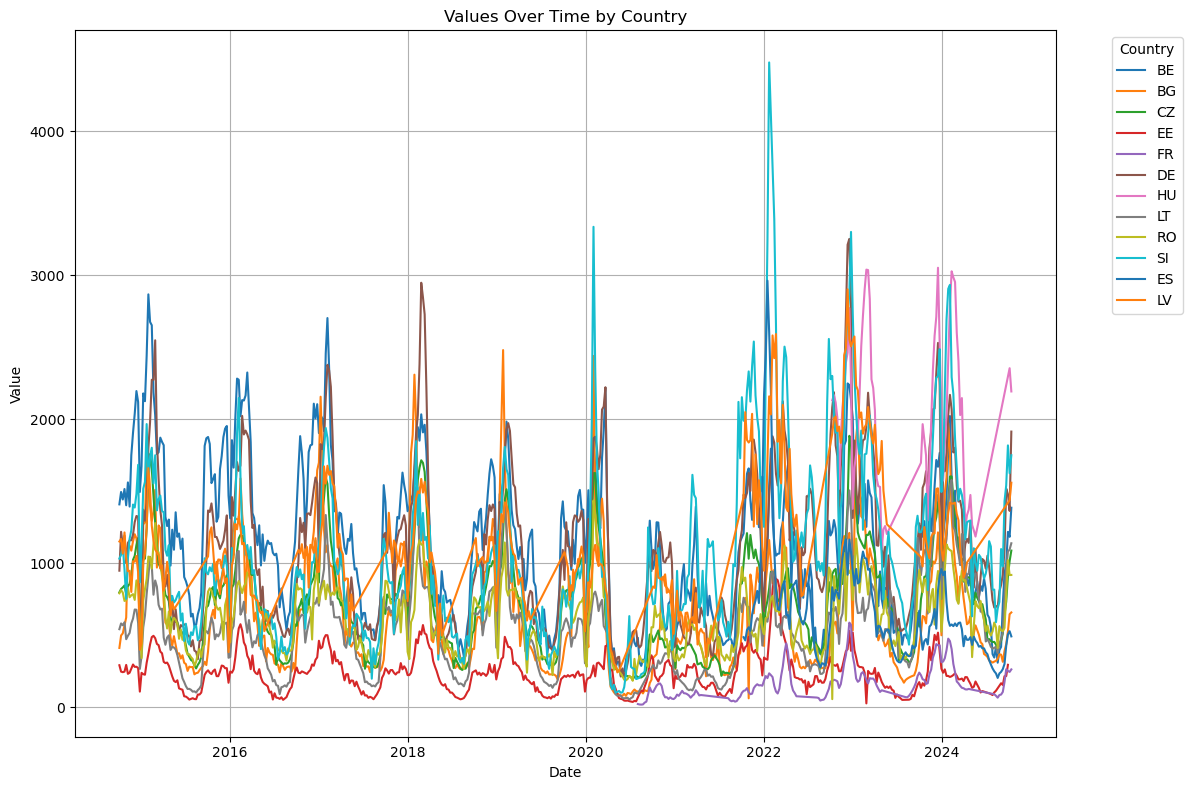

In [22]:
# Plot data for each country
plt.figure(figsize=(12, 8))
for country in countries_ari:
    country_data = ari[ari['value']<6000]
    country_data = country_data[country_data['location'] == country]
    plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

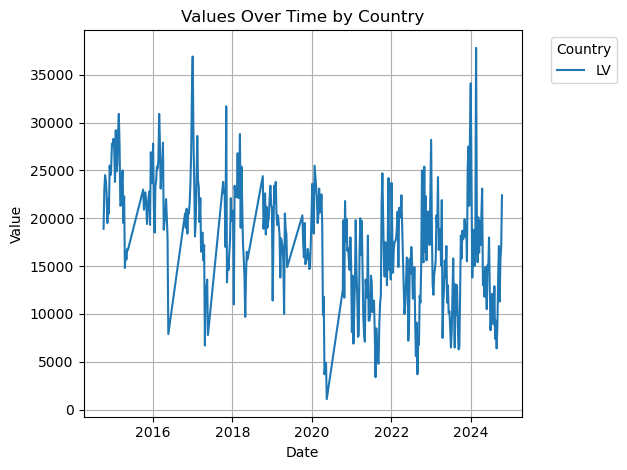

In [23]:
country_data = ari[ari['location'] == "LU"]
plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
ari[ari['value']>50000]

location truth_date year_week     value  relative_humidity_2m  \
4997       LV 2024-04-21  2024-W16  100000.0              77.38517   
5004       LV 2024-04-28  2024-W17  100000.0              78.77570   
5020       LV 2024-05-05  2024-W18  100000.0              66.32311   
5029       LV 2024-05-12  2024-W19  100000.0              71.71208   
5039       LV 2024-05-19  2024-W20  100000.0              69.08984   

      temperature_2m_max  temperature_2m_min  covid  
4997            6.335000            0.120714      1  
5004           12.949286            2.792143      1  
5020           17.177856            8.099286      1  
5029           10.342143            4.570714      1  
5039           21.149286            8.899286      1

In [25]:
aux_ili = ['SI', 'DK', 'EE', 'PL', 'FR', 'AT', 'HR', 'RO', 'GR', 'HU', 'IE',
       'LV', 'BE', 'LT', 'NL', 'CZ', 'NO']

country_ili_2 = ['LU','MT']

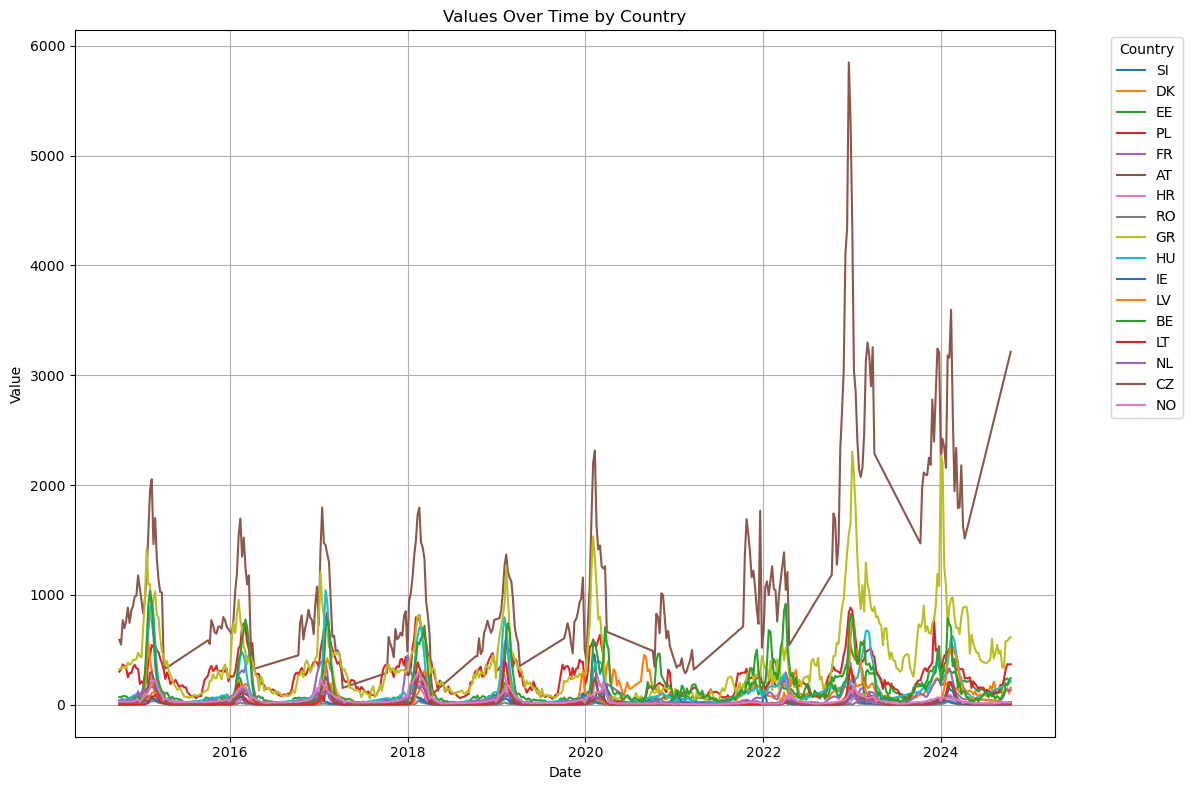

In [26]:
# Plot data for each country
plt.figure(figsize=(12, 8))
for country in aux_ili:
    country_data = ili[ili['value']<50000]
    country_data = country_data[country_data['location'] == country]
    plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

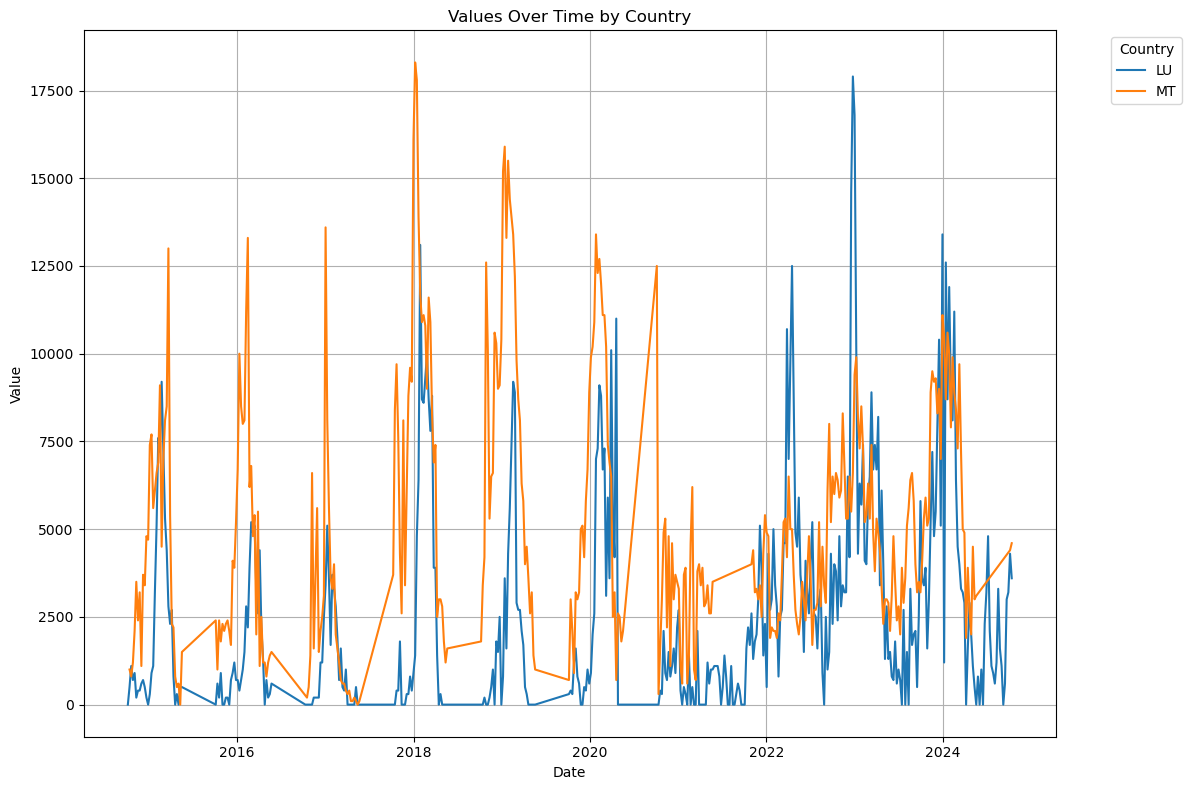

In [27]:
# Plot data for each country
plt.figure(figsize=(12, 8))
for country in country_ili_2:
    country_data = ili[ili['value']<50000]
    country_data = country_data[country_data['location'] == country]
    plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
def stat_check(data,country):
    dat = data[data['location']==country]
    adf_test = adfuller(dat['value'])
    print(f'p-value: %f for {country}' % adf_test[1])


In [37]:
ili['location'].unique()

array(['SI', 'DK', 'EE', 'PL', 'FR', 'AT', 'HR', 'RO', 'GR', 'HU', 'IE',
       'LV', 'BE', 'LU', 'LT', 'NL', 'CZ', 'NO', 'MT'], dtype=object)

In [38]:
for i in ili['location'].unique():
    stat_check(ili,i)

p-value: 0.000000 for SI
p-value: 0.000313 for DK
p-value: 0.003911 for EE
p-value: 0.000001 for PL
p-value: 0.000000 for FR
p-value: 0.020882 for AT
p-value: 0.000000 for HR
p-value: 0.000000 for RO
p-value: 0.000025 for GR
p-value: 0.000000 for HU
p-value: 0.000001 for IE
p-value: 0.998974 for LV
p-value: 0.000000 for BE
p-value: 0.000005 for LU
p-value: 0.000000 for LT
p-value: 0.000000 for NL
p-value: 0.000000 for CZ
p-value: 0.000000 for NO
p-value: 0.000002 for MT


In [40]:
for i in ari['location'].unique():
    stat_check(ari,i)

p-value: 0.000000 for CZ
p-value: 0.001158 for SI
p-value: 0.000002 for LU
p-value: 0.000000 for EE
p-value: 0.000000 for BG
p-value: 0.000000 for RO
p-value: 0.952921 for LV
p-value: 0.000006 for BE
p-value: 0.000437 for LT
p-value: 0.000012 for DE
p-value: 0.009559 for FR
p-value: 0.100017 for ES
p-value: 0.017999 for HU


In [48]:
ari_names = ['CZ', 'SI', 'LU', 'EE', 'BG', 'RO', 'LV', 'BE', 'LT', 'DE', 'FR',
       'ES']

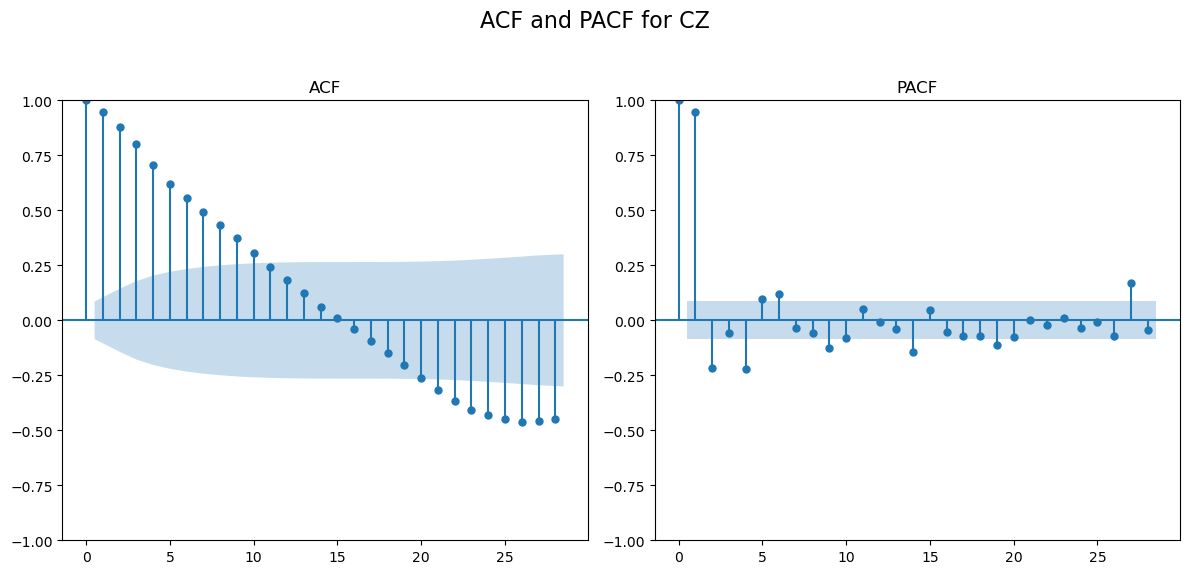

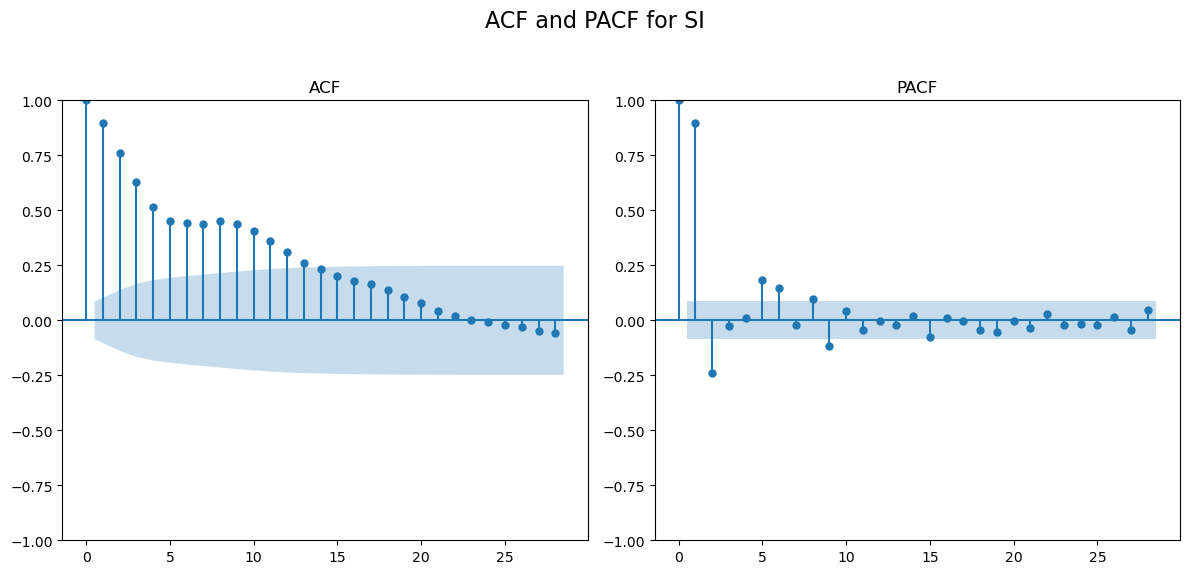

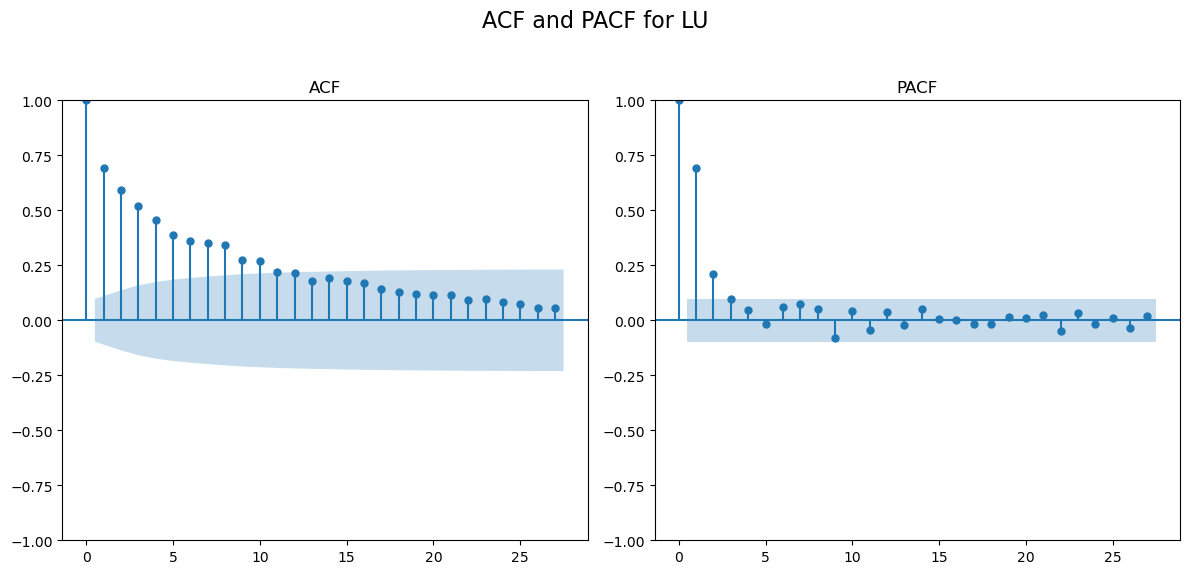

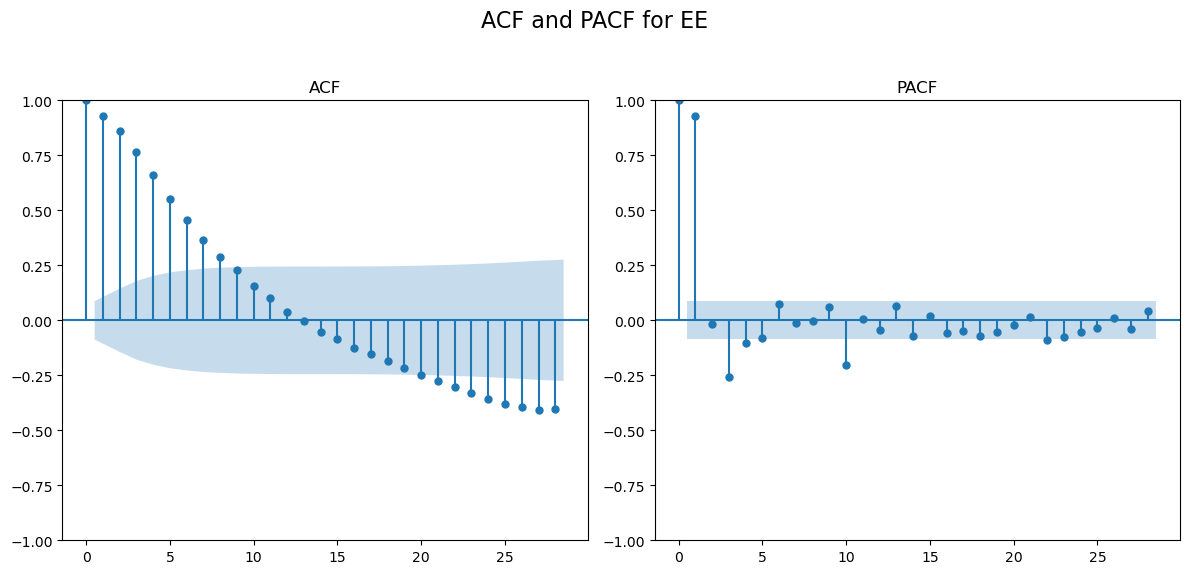

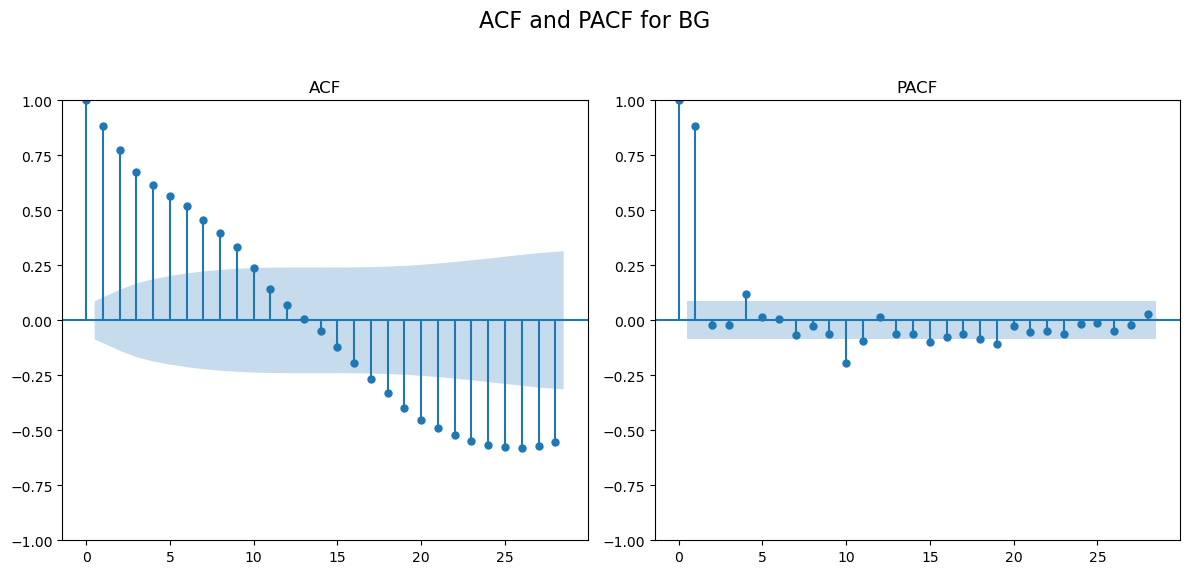

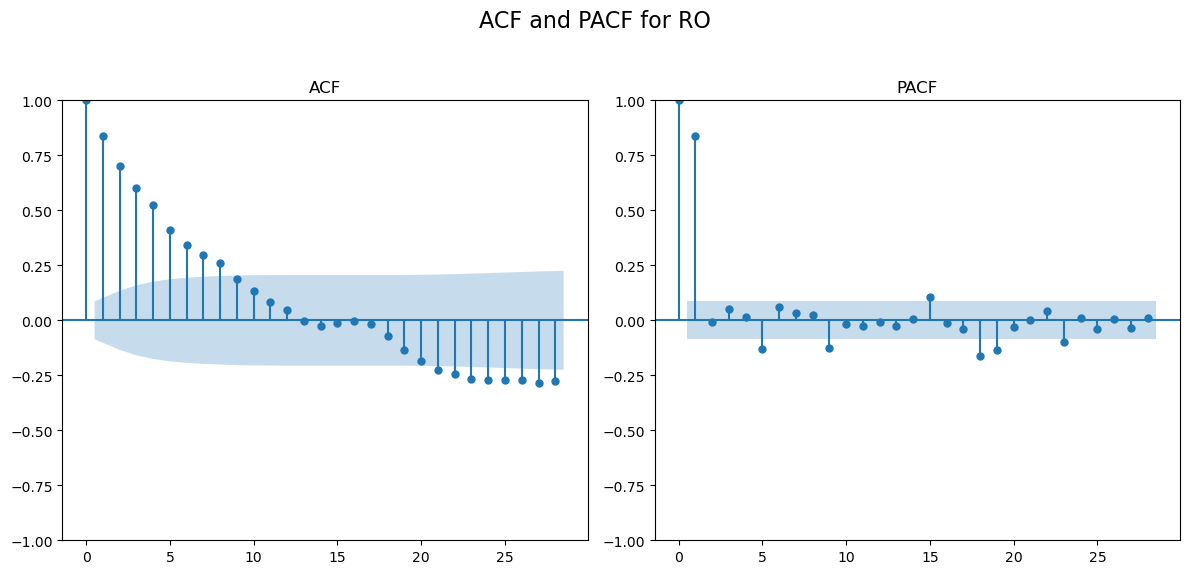

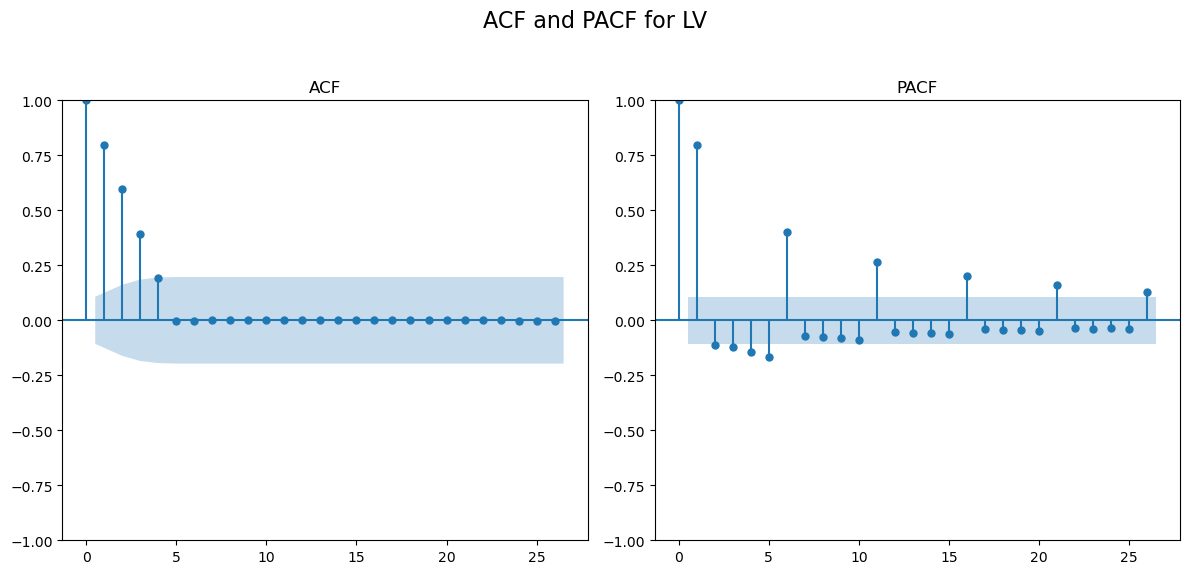

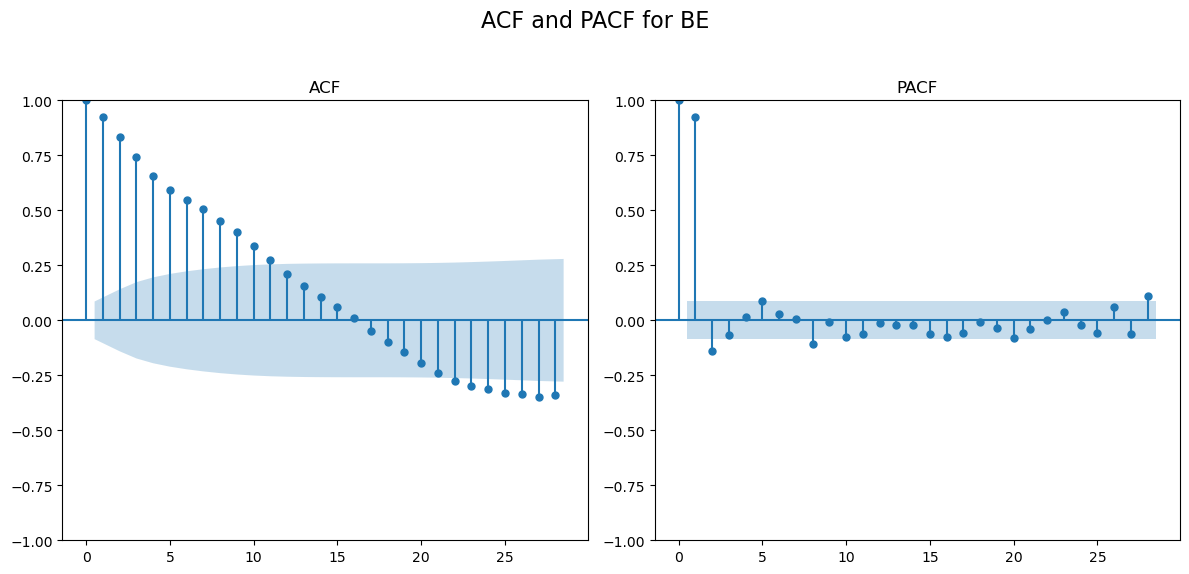

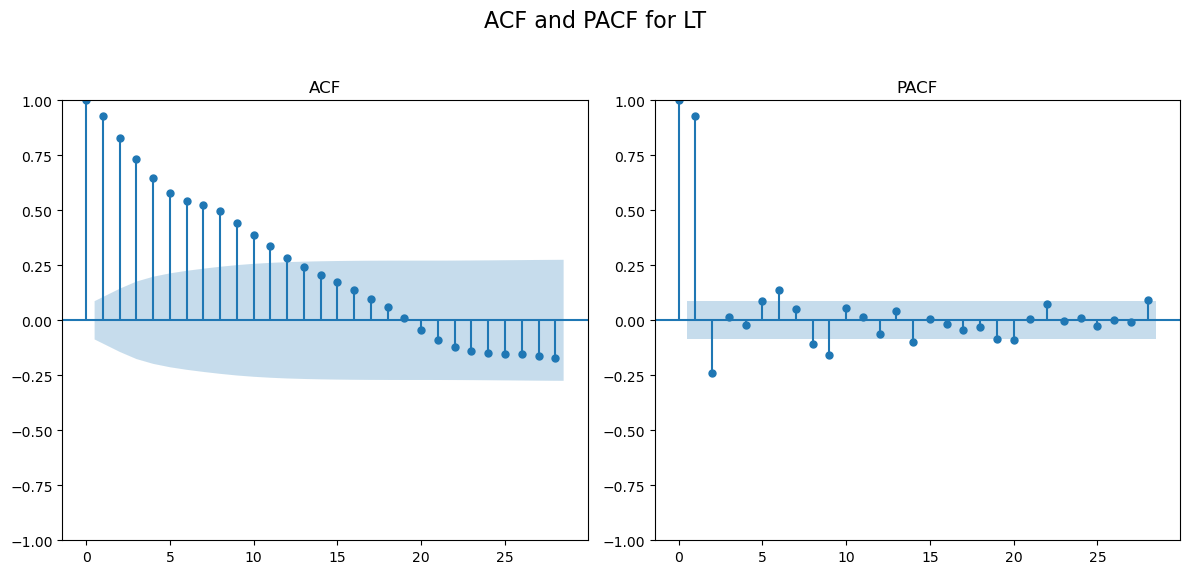

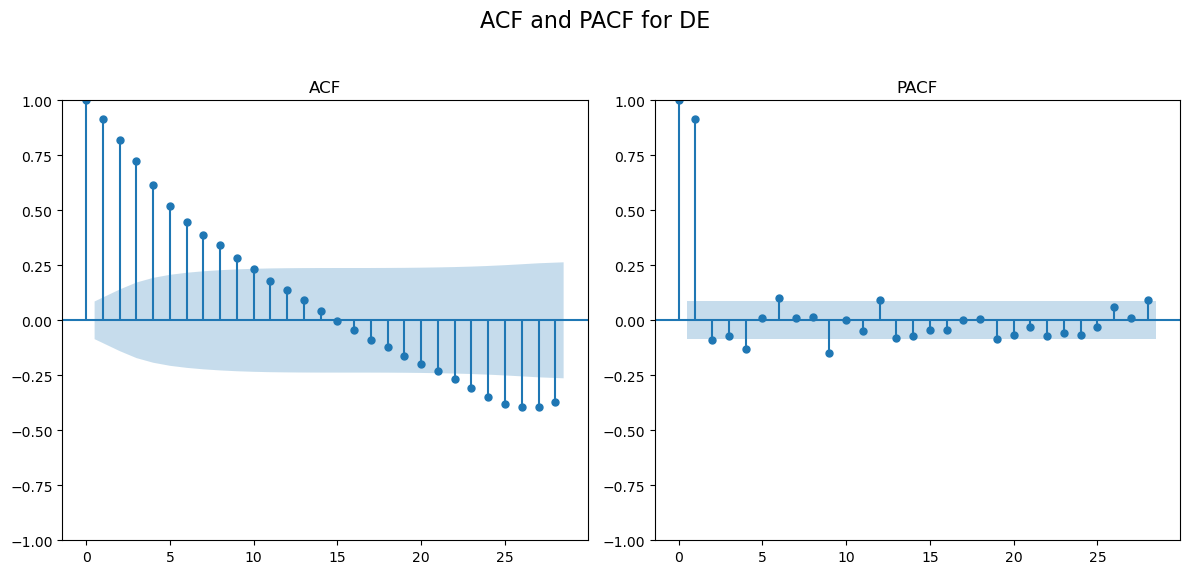

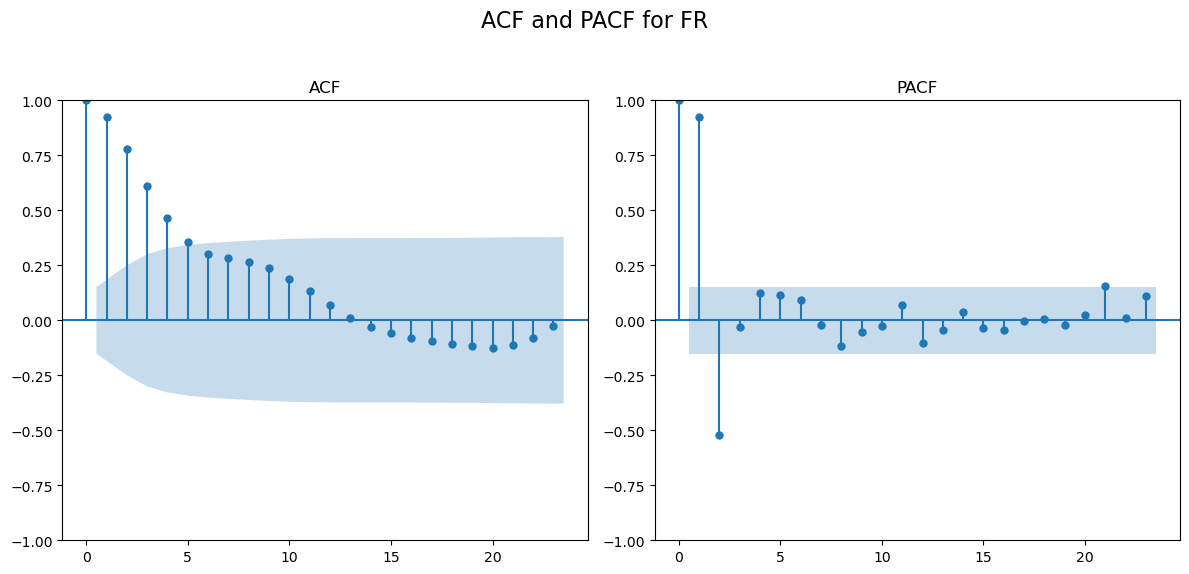

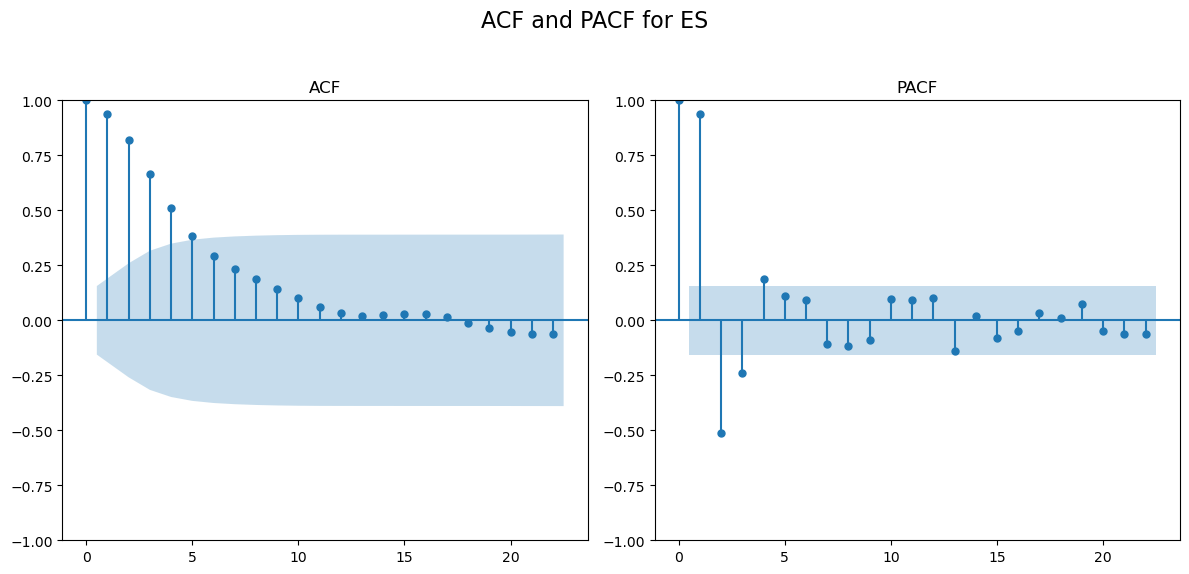

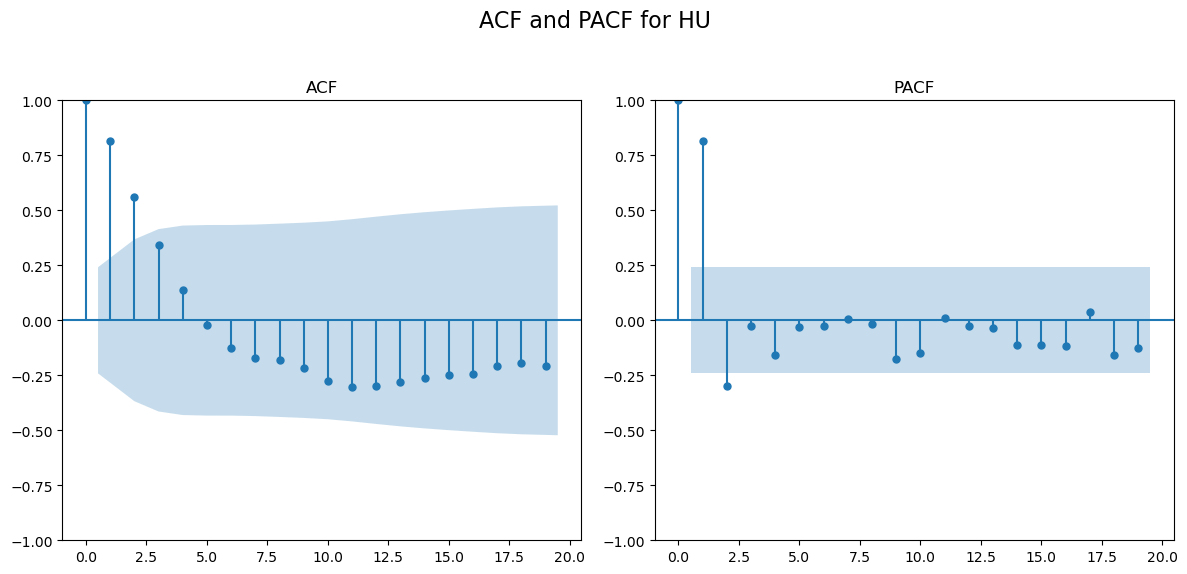

In [50]:
for country in ari['location'].unique():
    country_data = ari[ari['location'] == country]['value']
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"ACF and PACF for {country}", fontsize=16)
    
    # Plot ACF
    plt.subplot(1, 2, 1)
    plot_acf(country_data, ax=plt.gca())
    plt.title("ACF")
    
    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(country_data, ax=plt.gca(), method='ywm')
    plt.title("PACF")
    
    # Show the plots for the current country
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

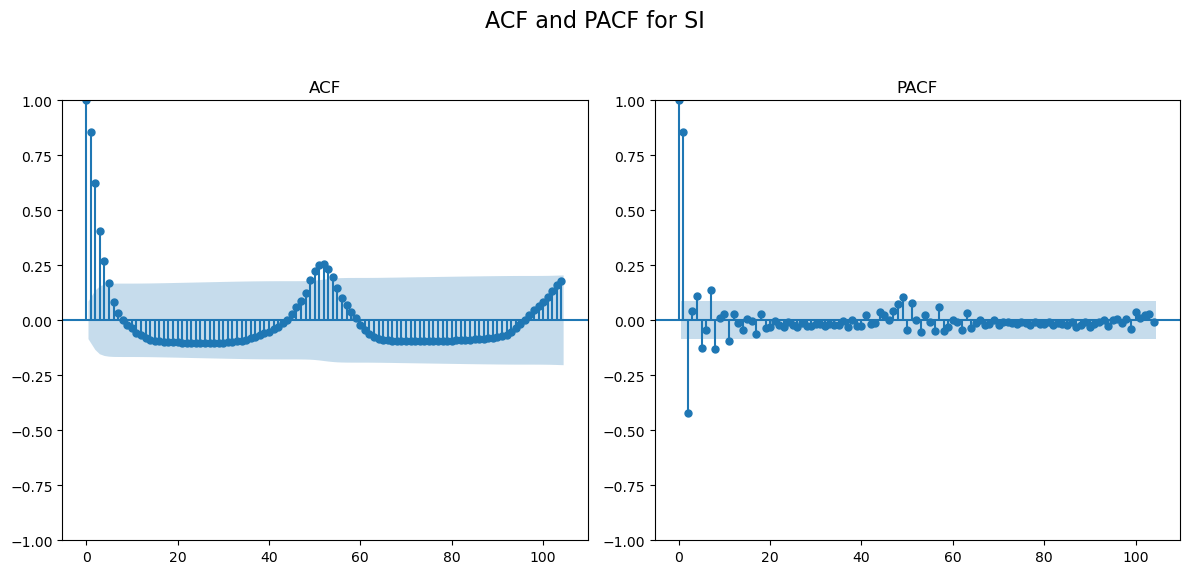

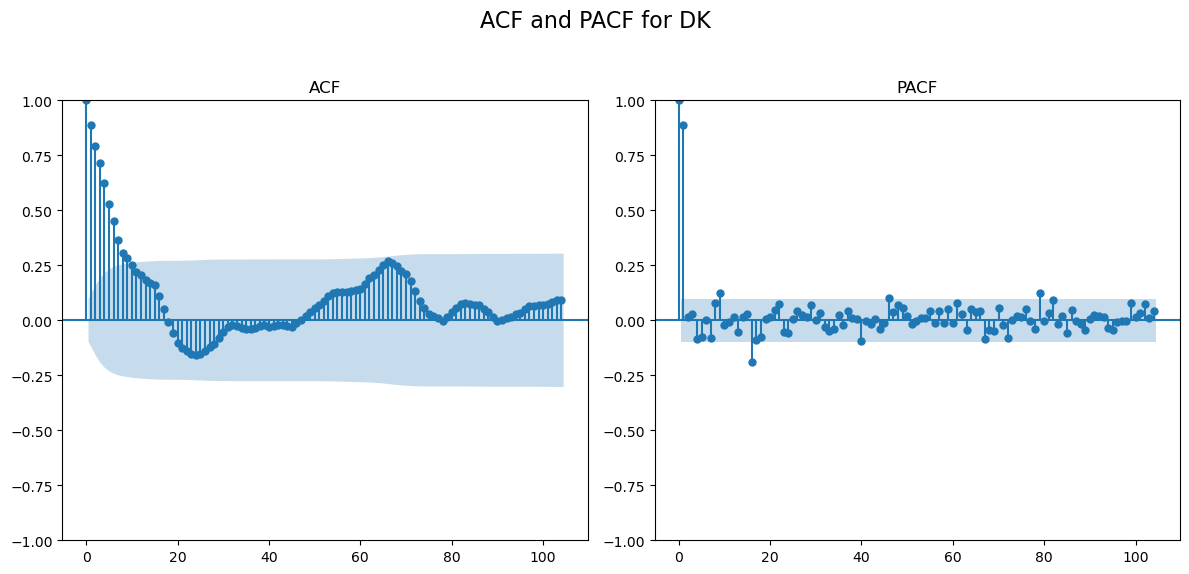

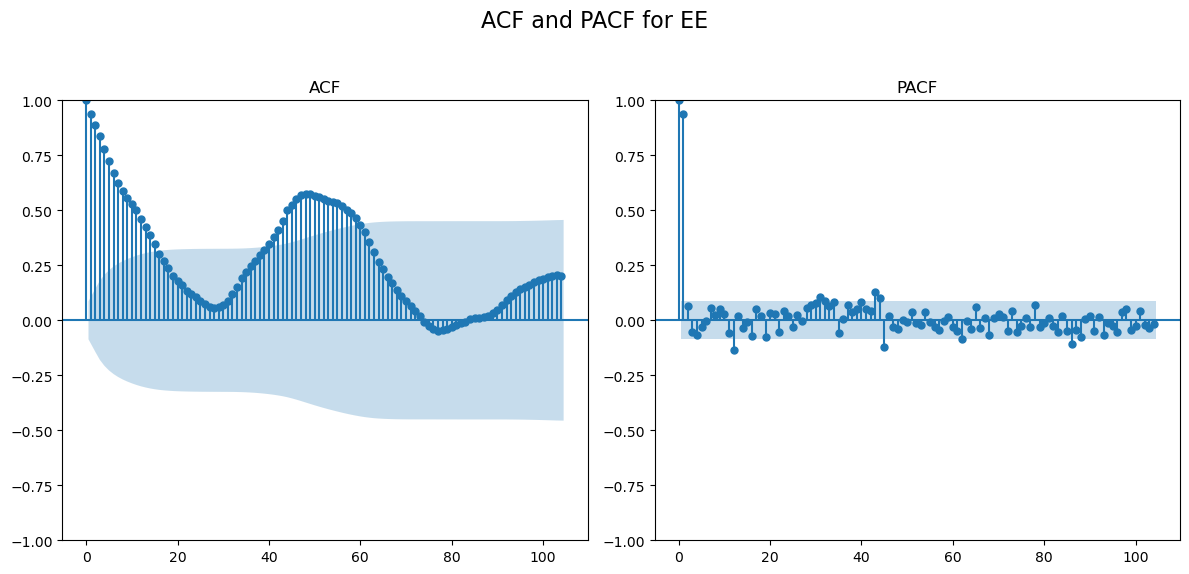

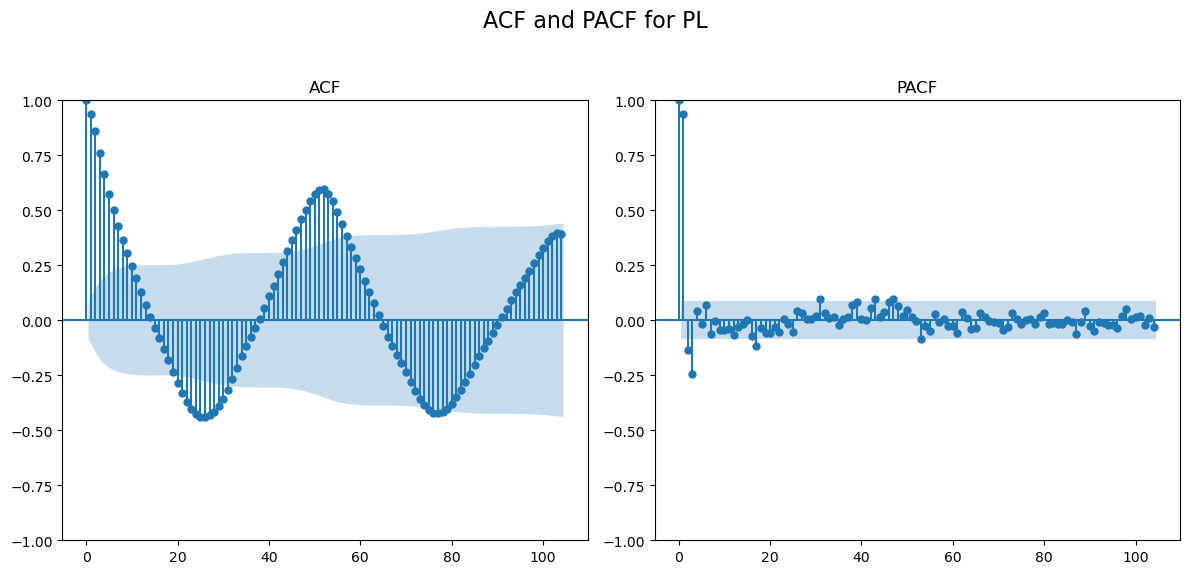

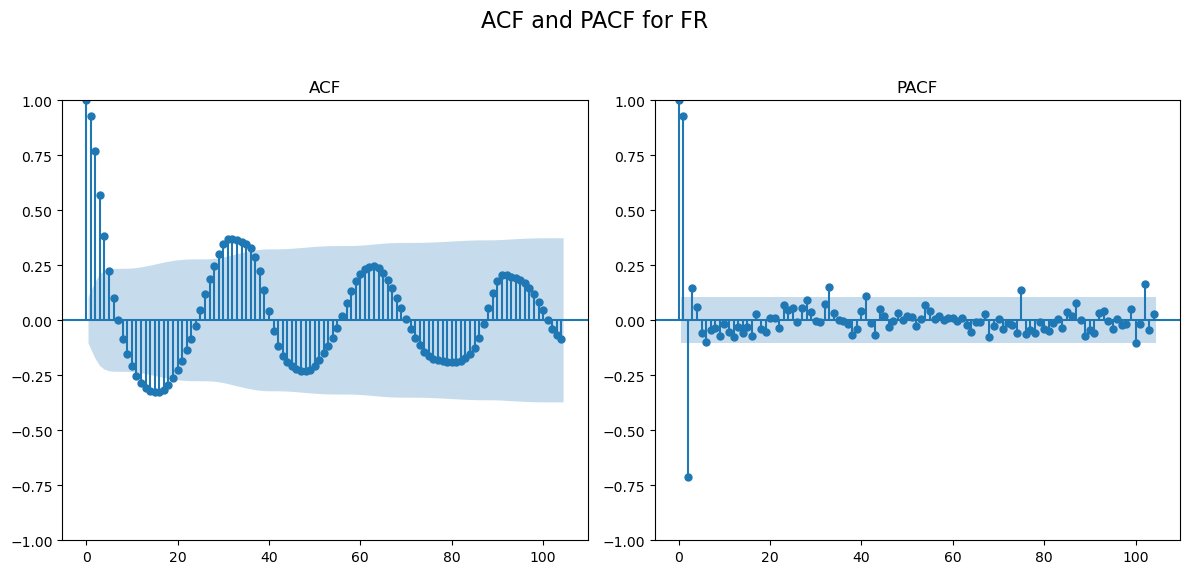

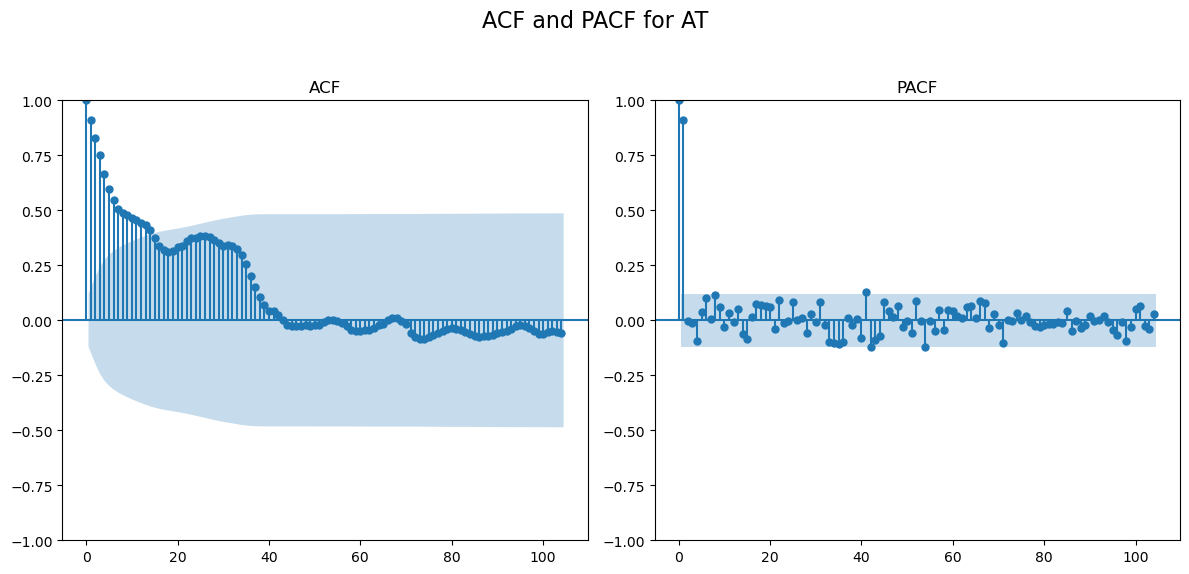

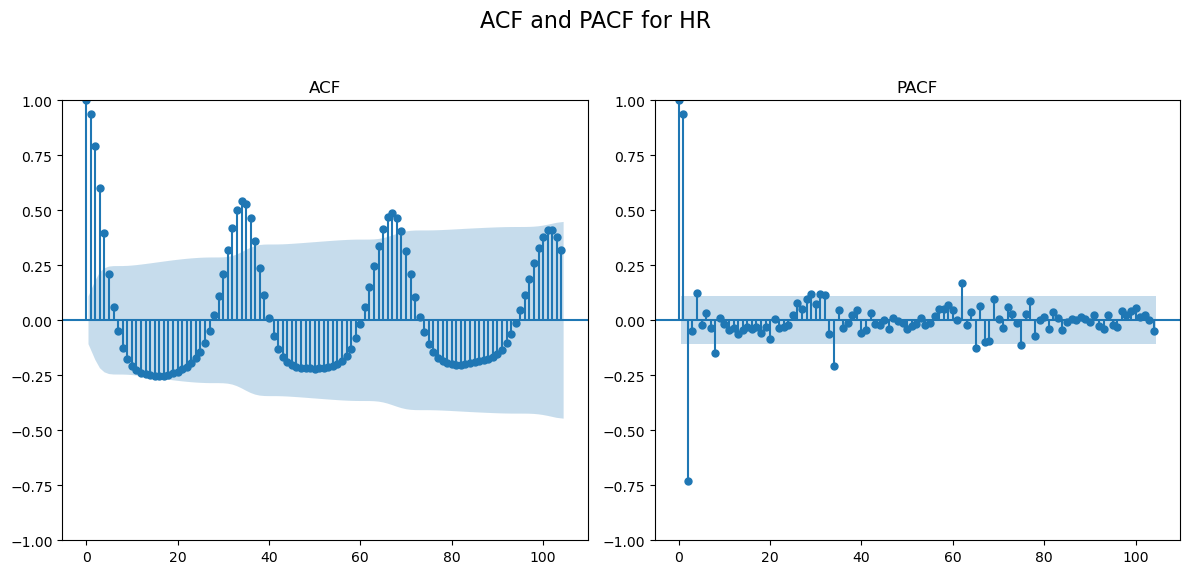

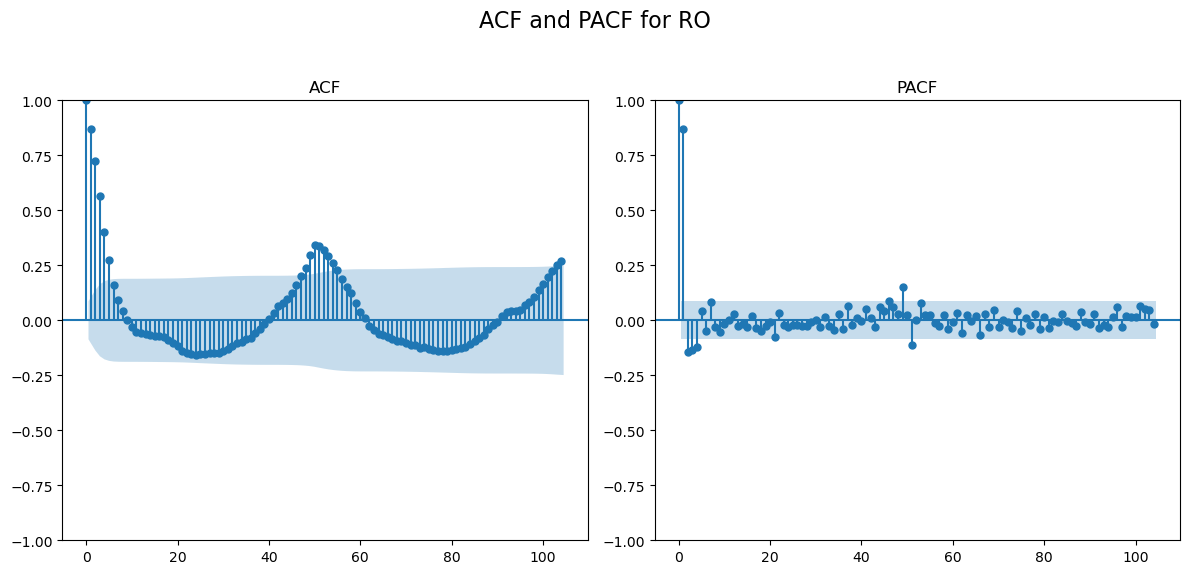

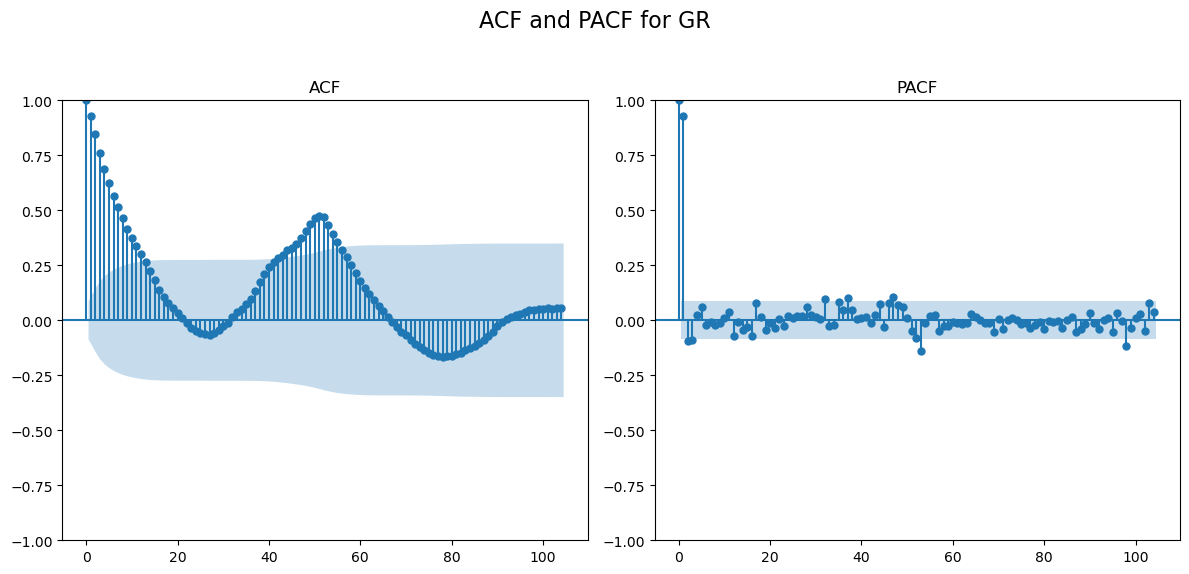

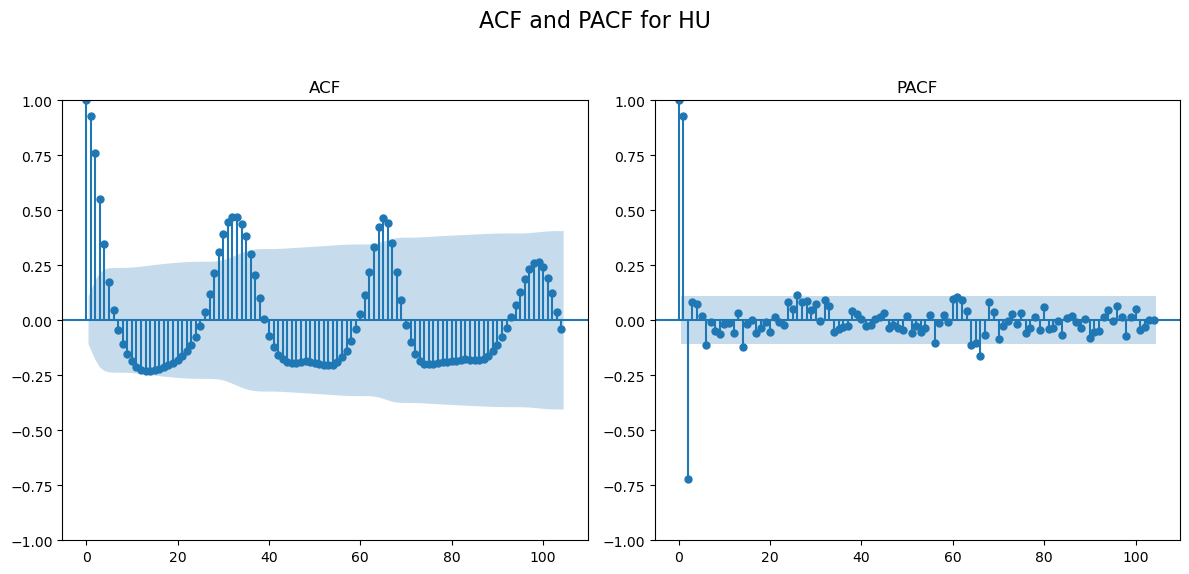

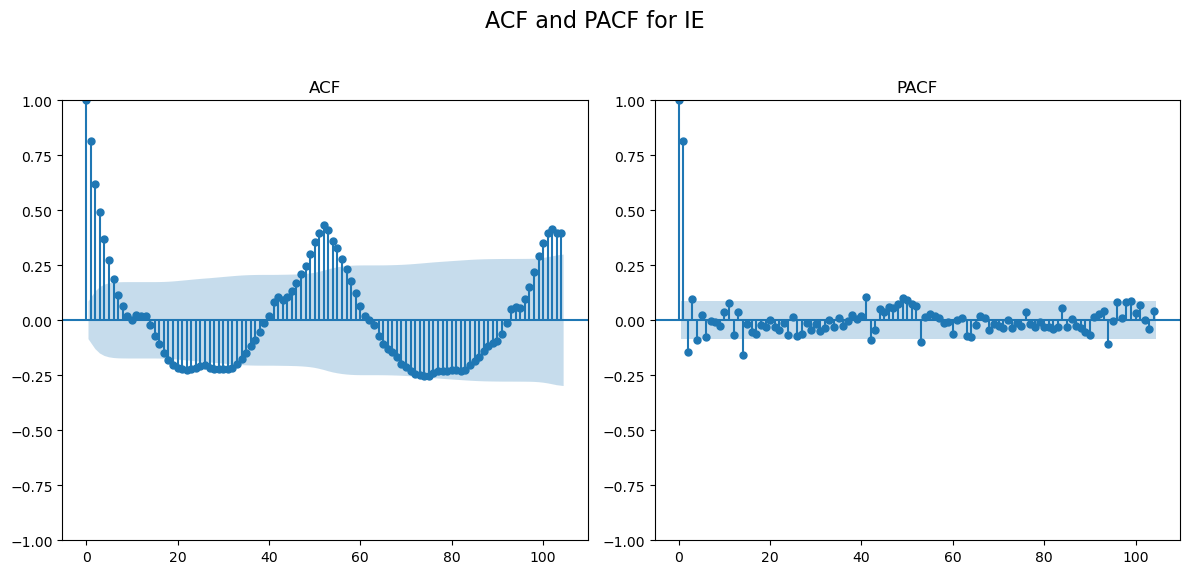

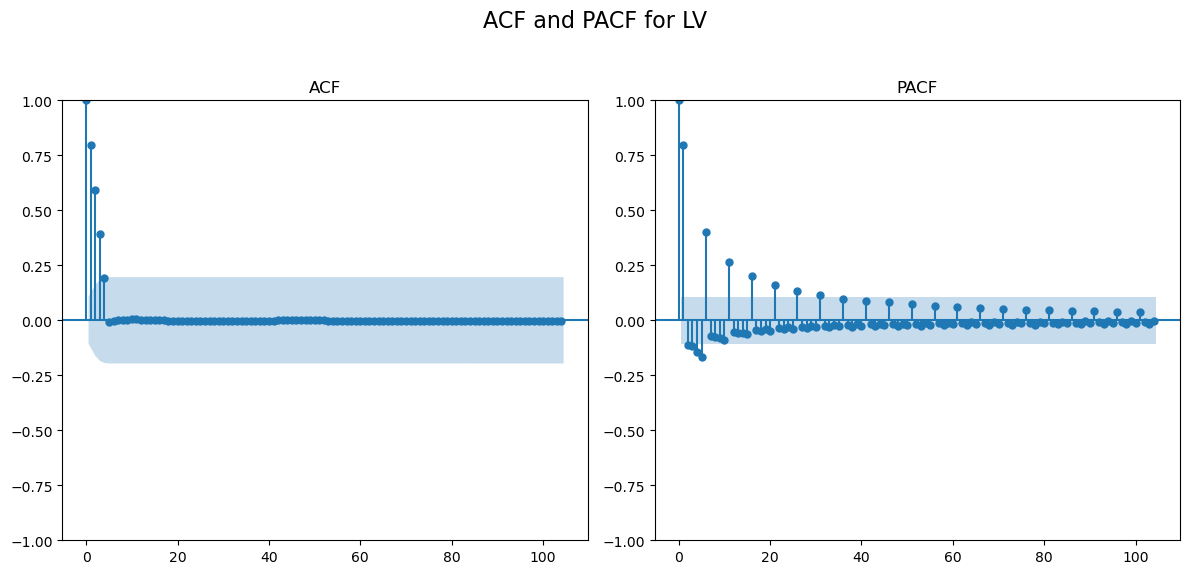

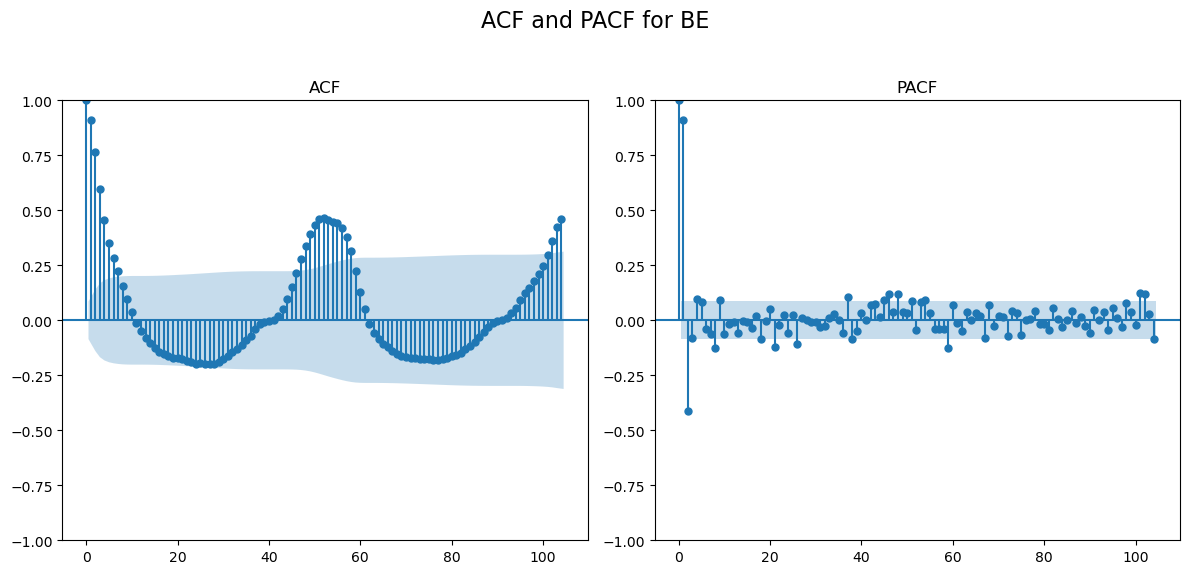

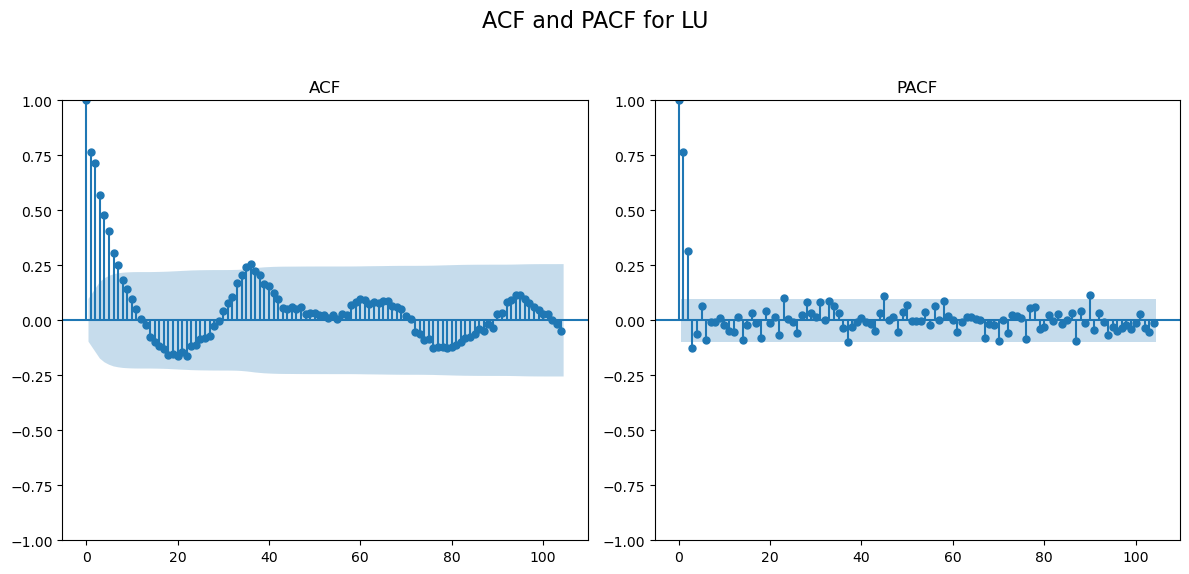

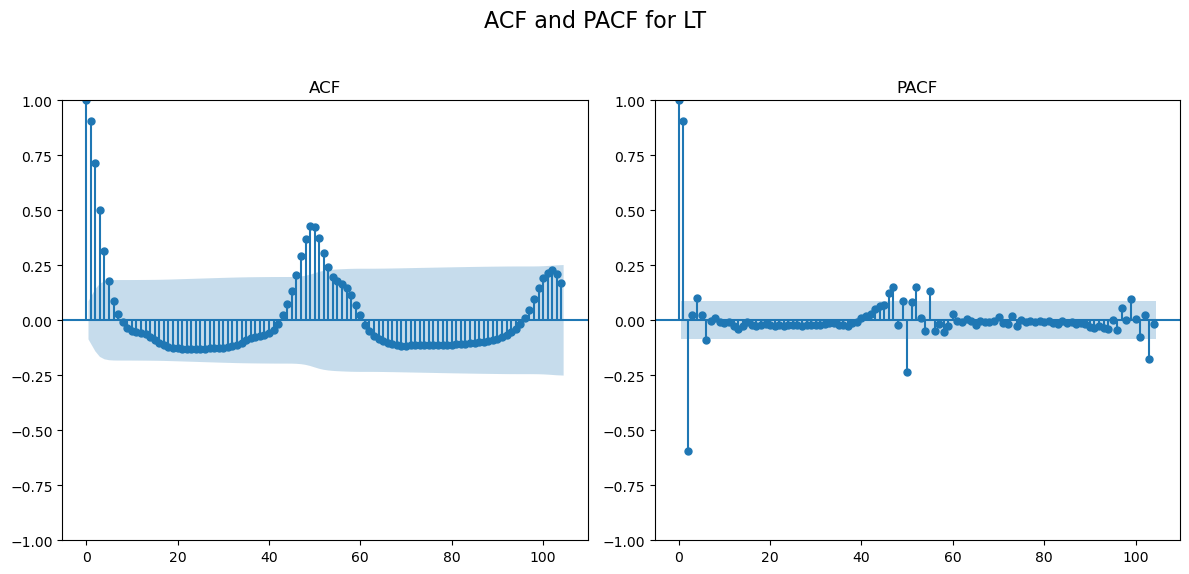

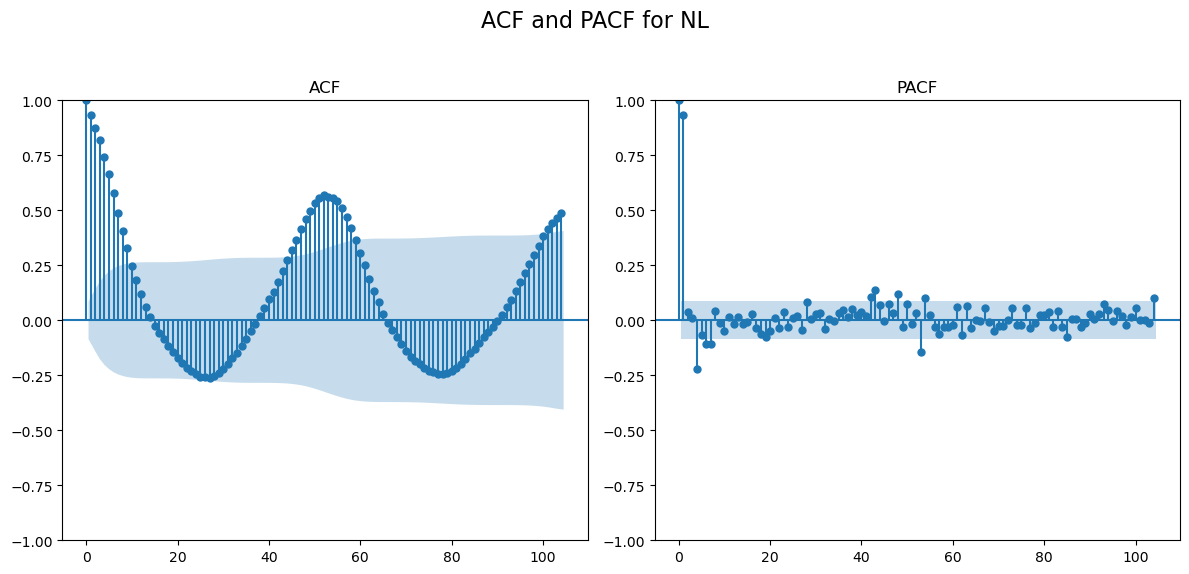

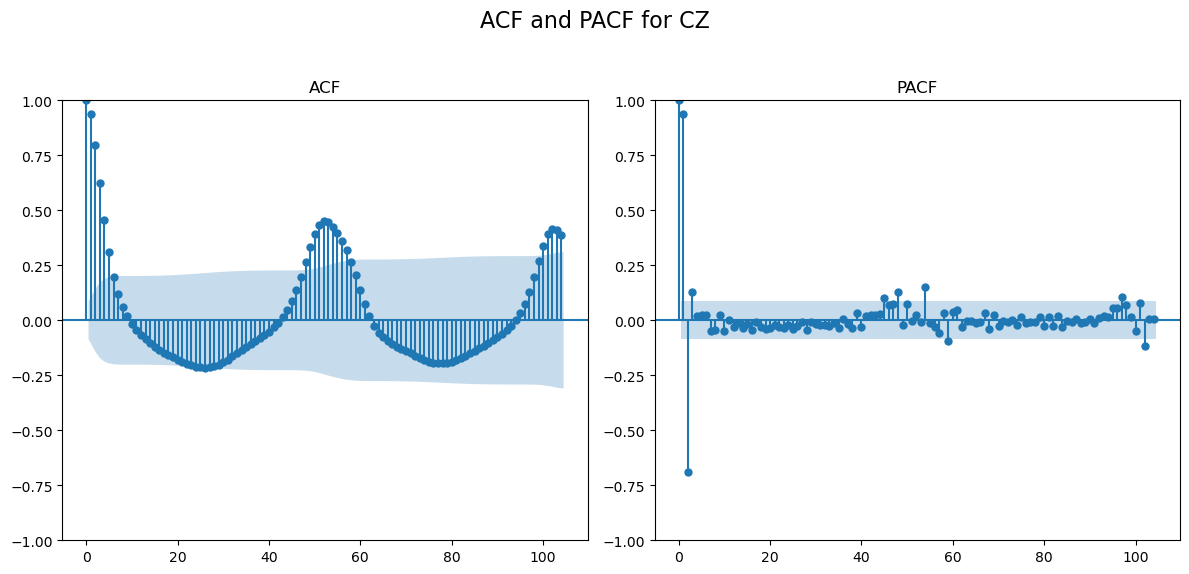

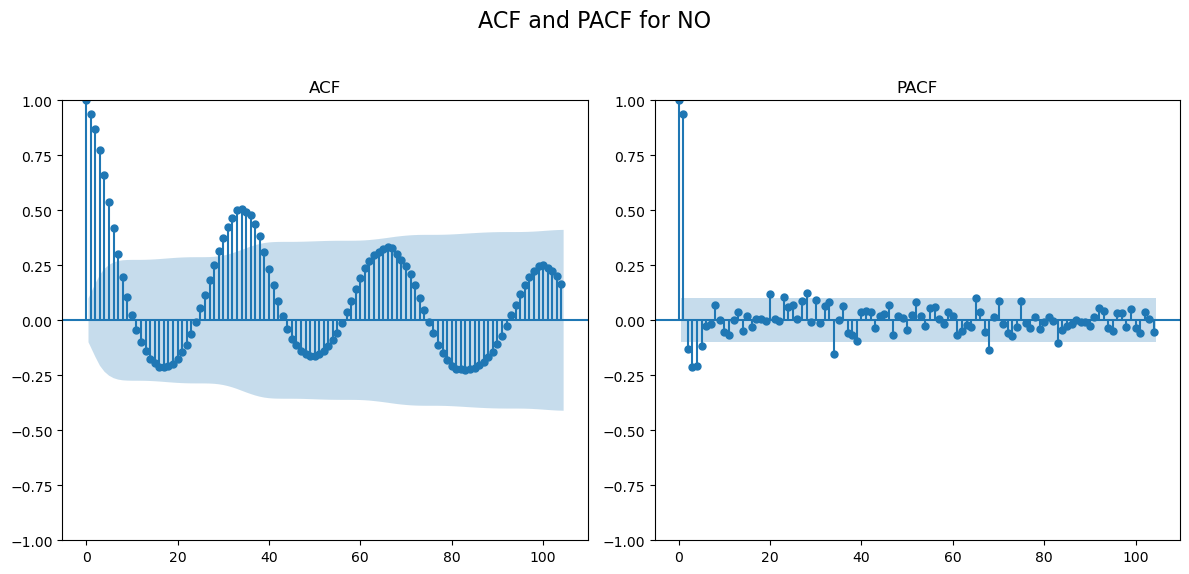

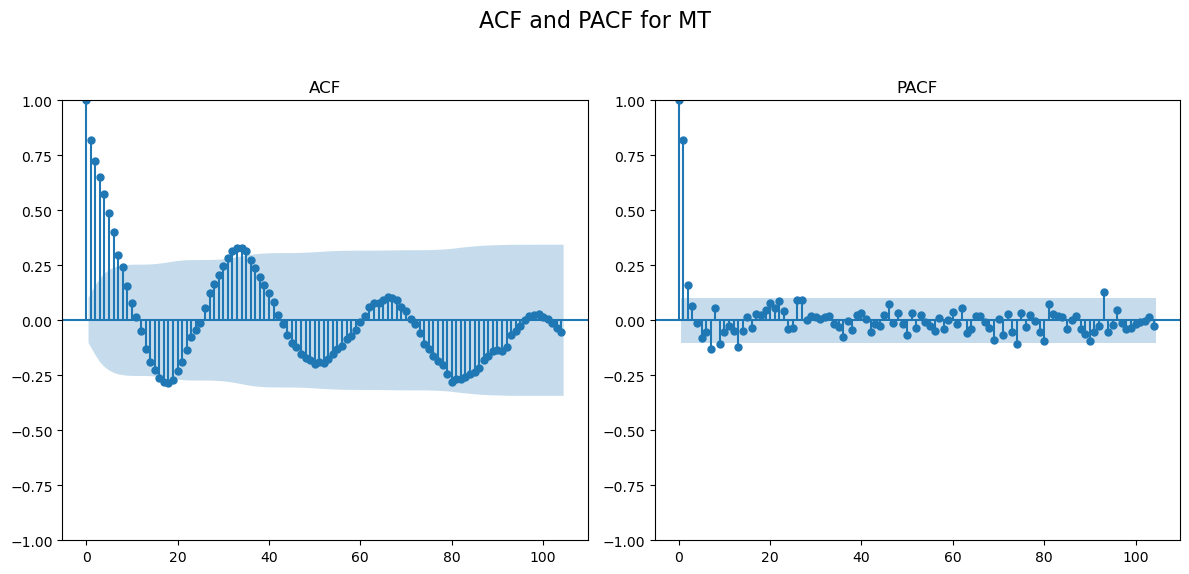

In [43]:
for country in ili['location'].unique():
    country_data = ili[ili['location'] == country]['value']
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"ACF and PACF for {country}", fontsize=16)
    
    # Plot ACF
    plt.subplot(1, 2, 1)
    plot_acf(country_data, lags=104, ax=plt.gca())
    plt.title("ACF")
    
    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(country_data, lags=104, ax=plt.gca(), method='ywm')
    plt.title("PACF")
    
    # Show the plots for the current country
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series_plot(series, model='additive', period=None):
    """
    Decomposes a time series into trend, seasonal, and residual components, 
    and returns a plot of the decomposition.

    Parameters:
        series (pd.Series): Time series data with a DateTime index.
        model (str): Type of decomposition. 'additive' or 'multiplicative' (default: 'additive').
        period (int): Number of observations per cycle (e.g., 12 for monthly data with an annual cycle).

    Returns:
        matplotlib.figure.Figure: Figure object containing the decomposition plot.
        
    Raises:
        ValueError: If period is not provided.
    """
    if period is None:
        raise ValueError("A 'period' (seasonal cycle length) must be provided.")

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(series, model=model, period=period)
    
    # Generate the plot of the decomposition components
    fig = decomposition.plot()
    fig.tight_layout()
    
    return fig

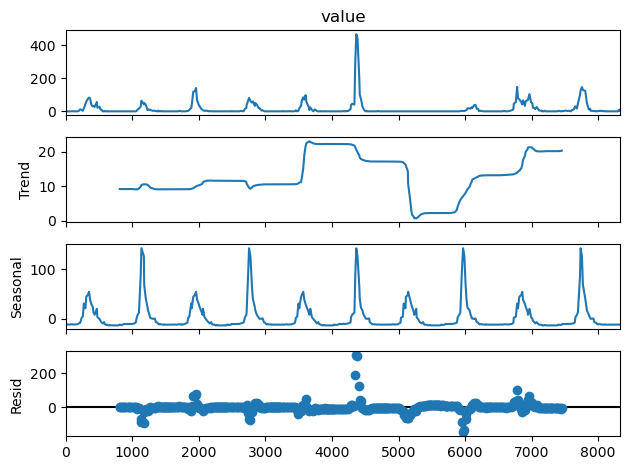

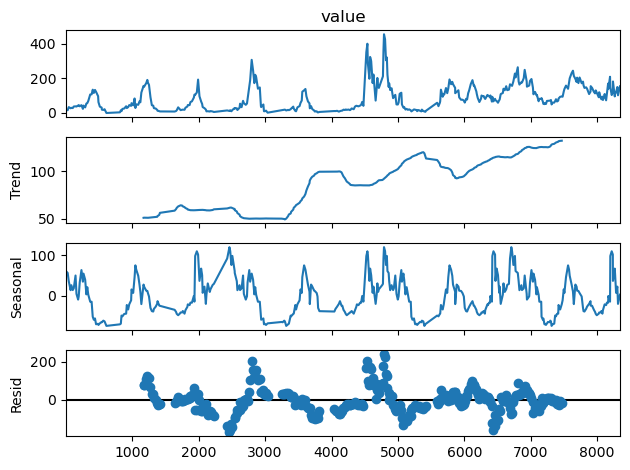

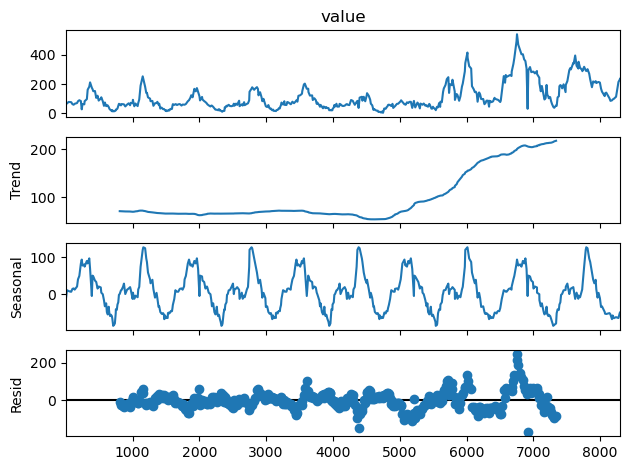

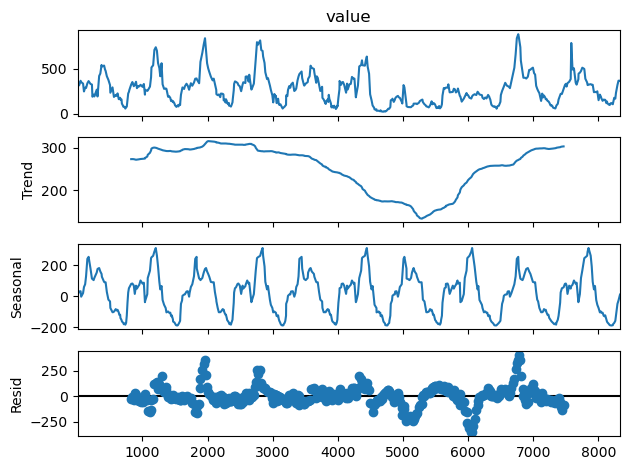

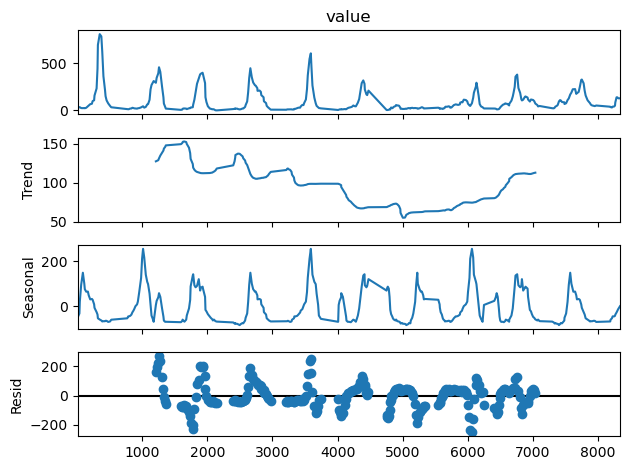

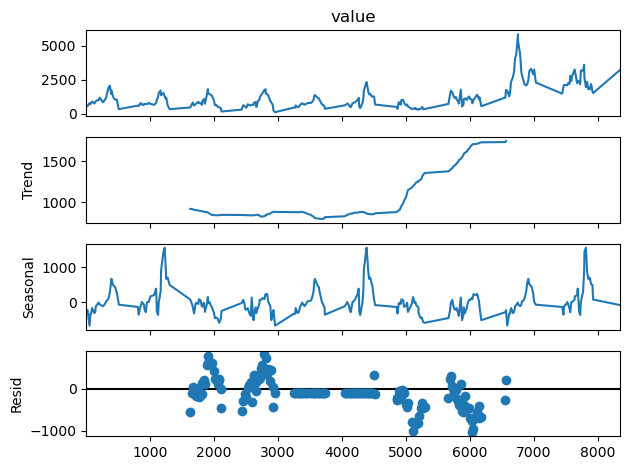

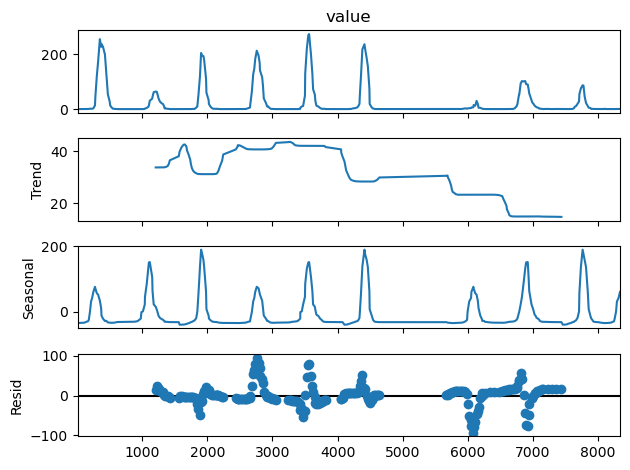

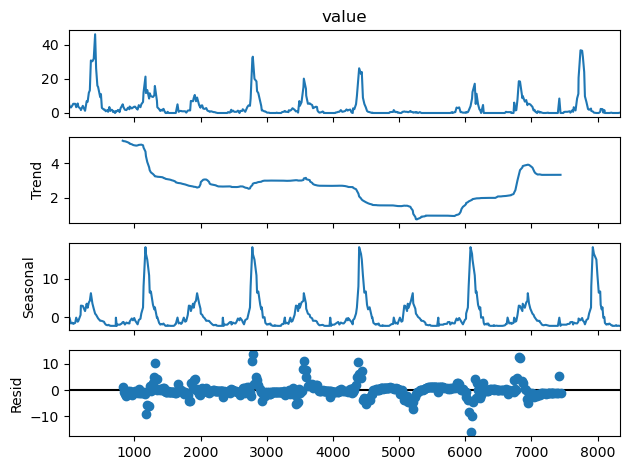

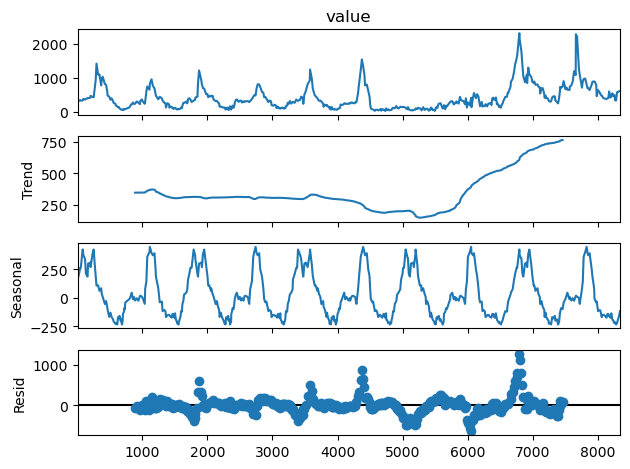

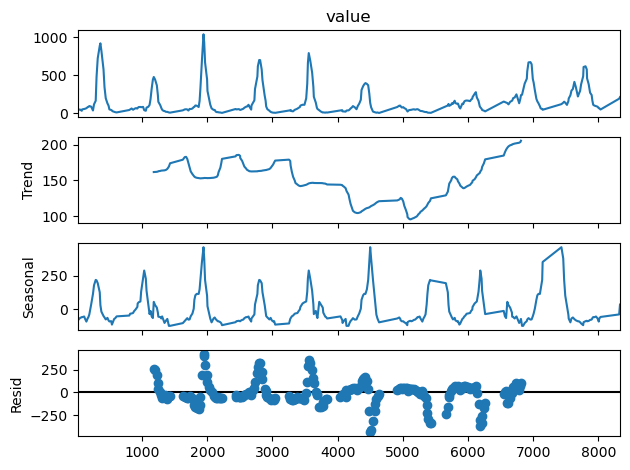

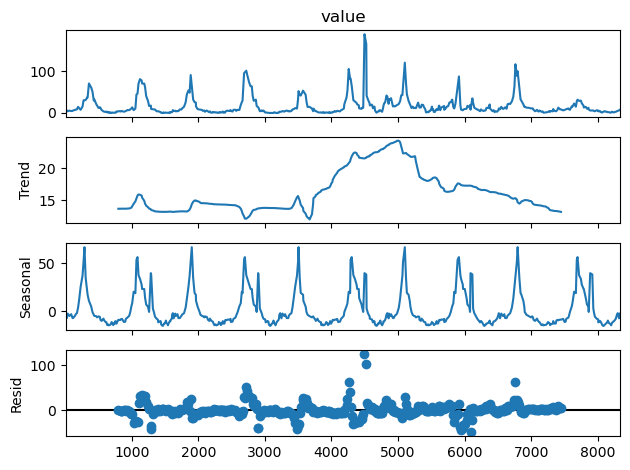

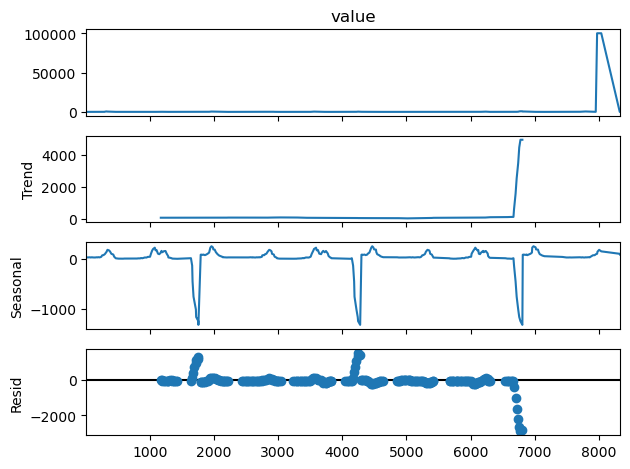

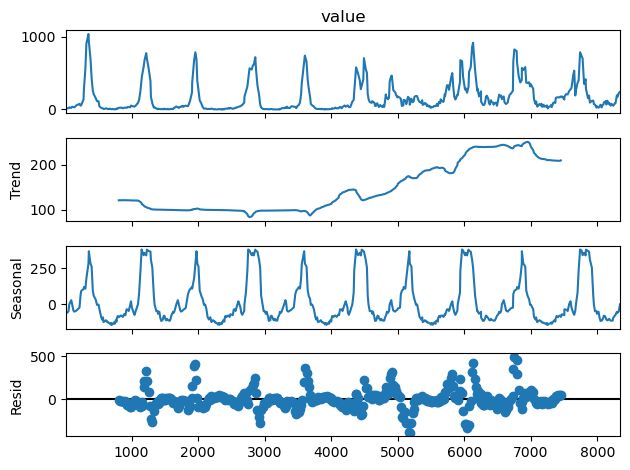

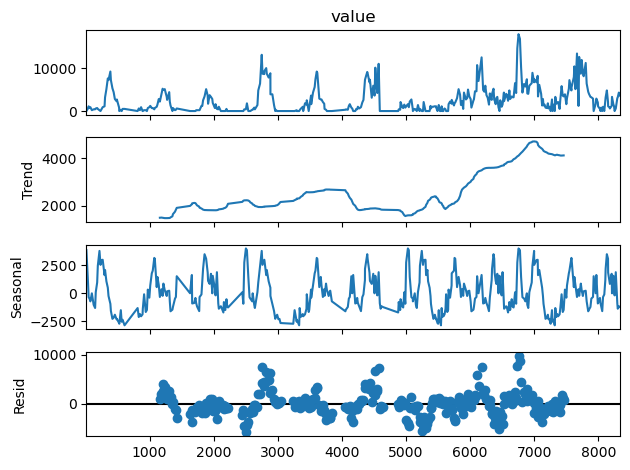

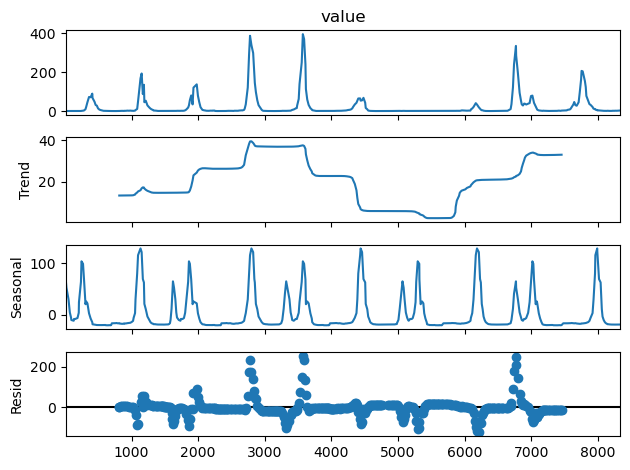

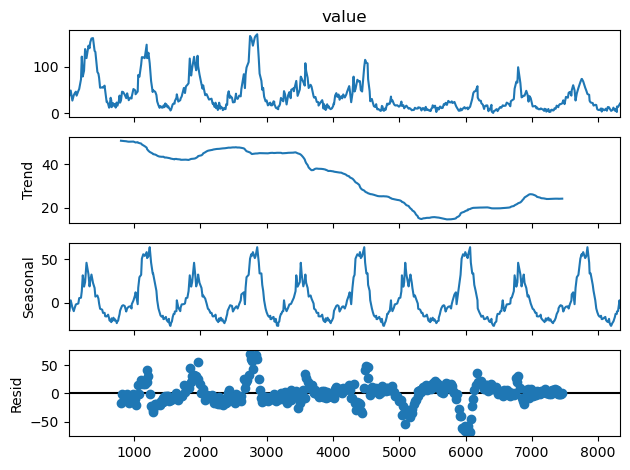

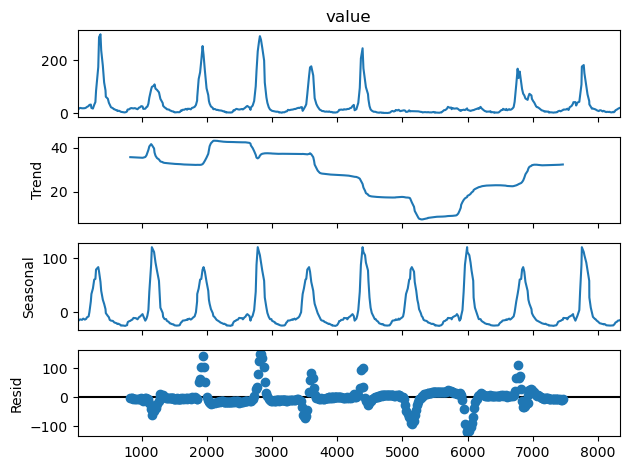

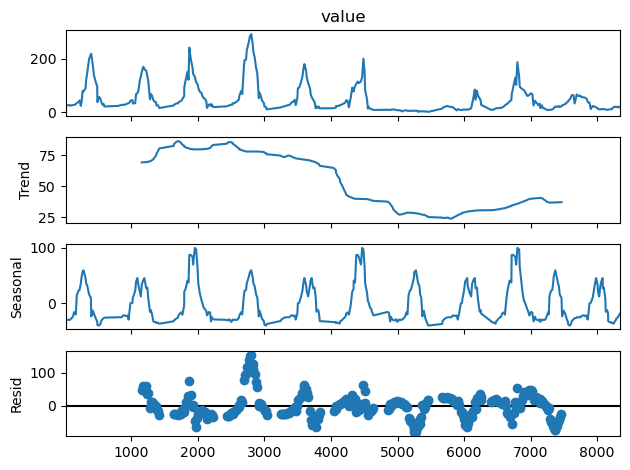

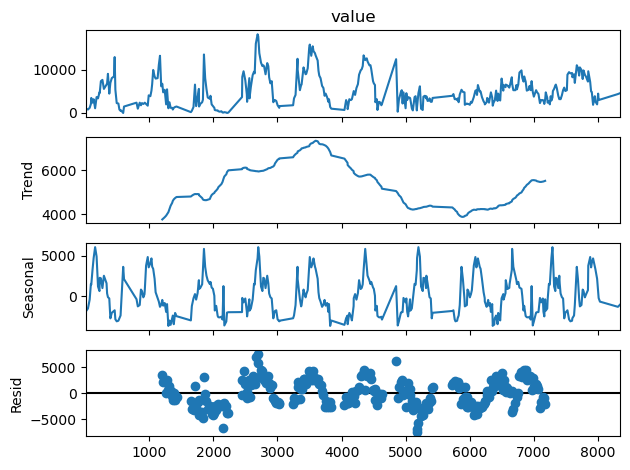

In [56]:
for country in ili['location'].unique():
    country_data = ili[ili['location'] == country]['value']
    decompose_time_series_plot(country_data,period=104)

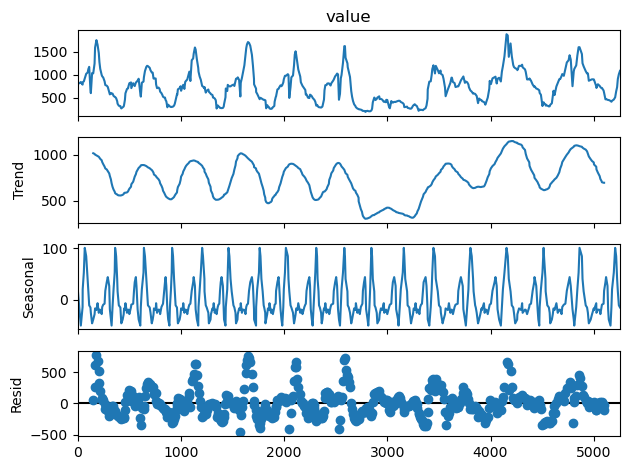

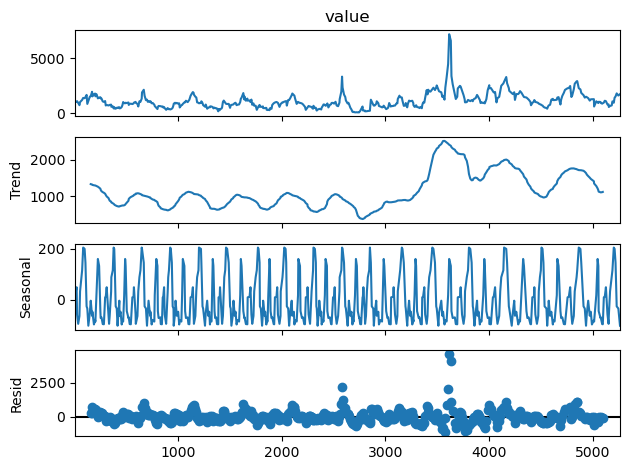

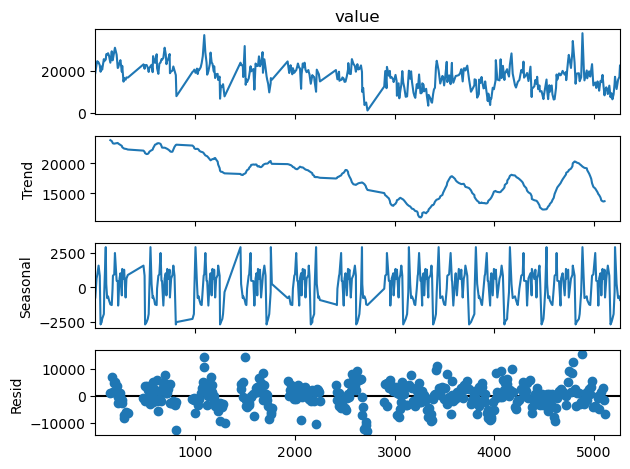

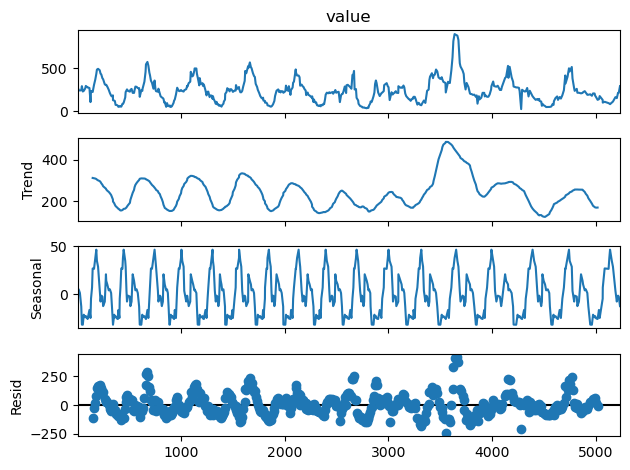

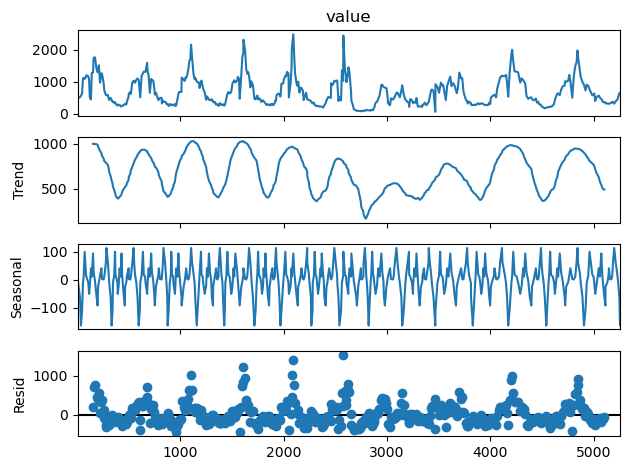

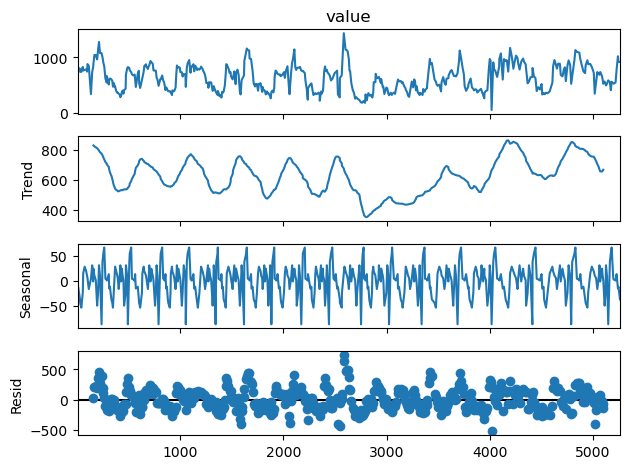

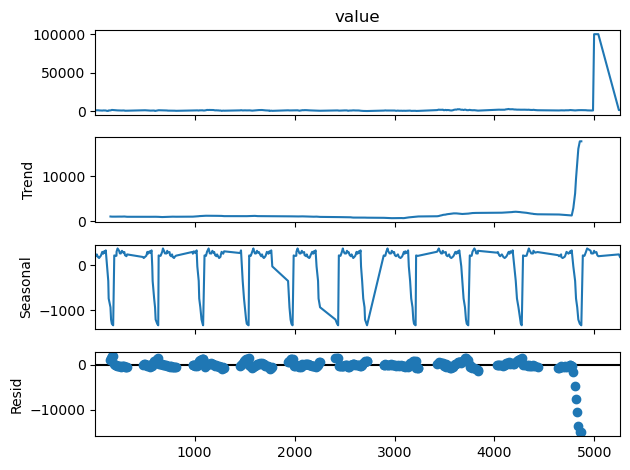

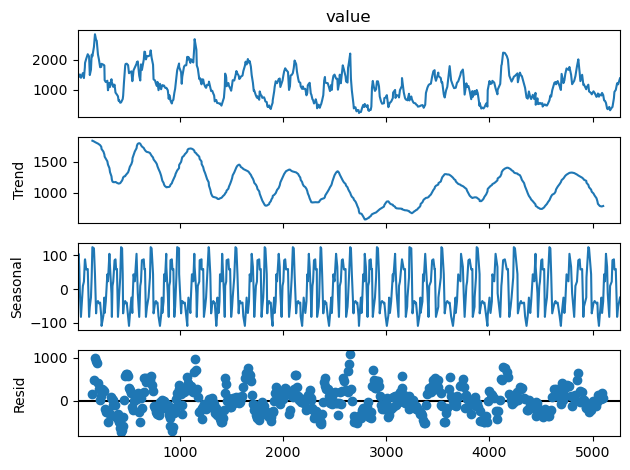

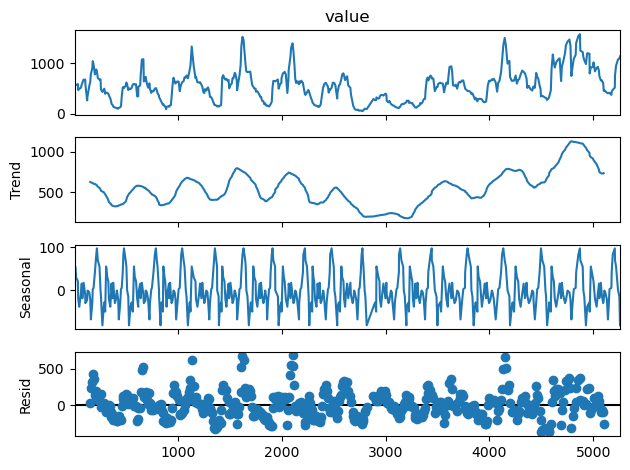

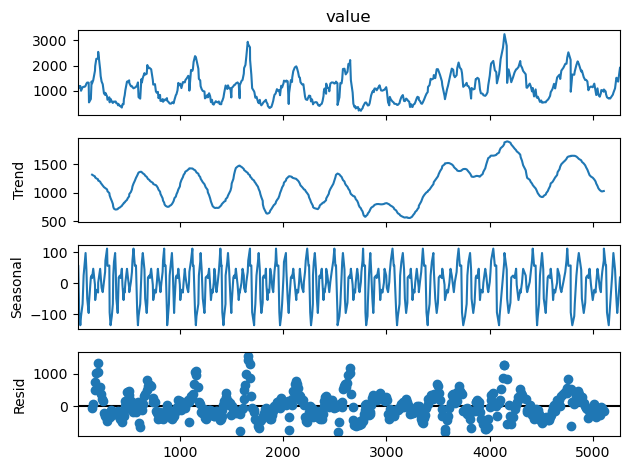

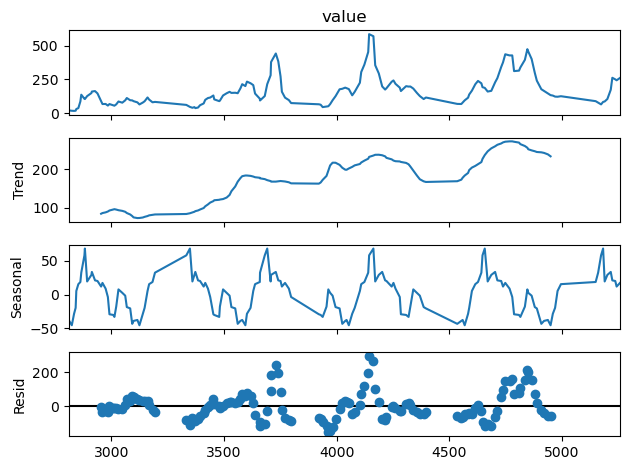

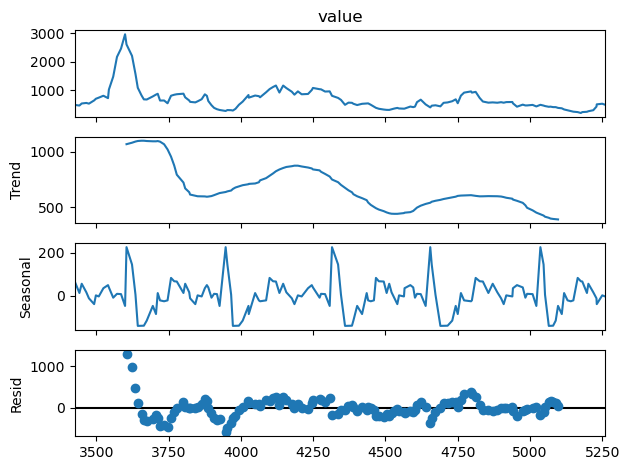

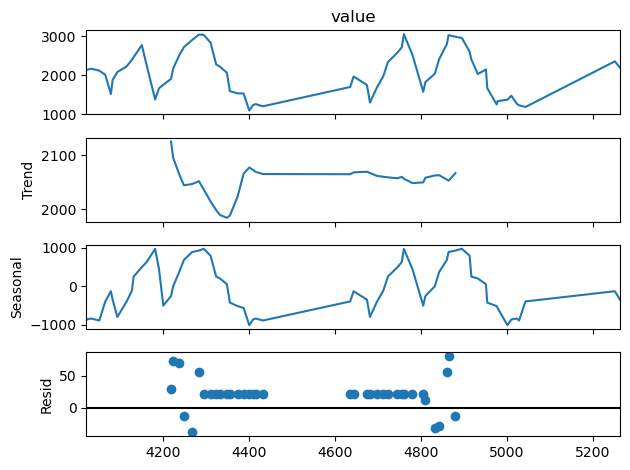

In [58]:
for country in ari['location'].unique():
    country_data = ari[ari['location'] == country]['value']
    decompose_time_series_plot(country_data,period=30)